#Equipo
Integrantes:

Yair Saul Berlin Pelaez

Rosa Carolina Romero López

Uriel Eluzai Moreno Hernández

Jesús David Atacho Galíndez

David Sebastián Méndez Hernández

Bianca Lisset Vélez Velázquez


#Actividad 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt


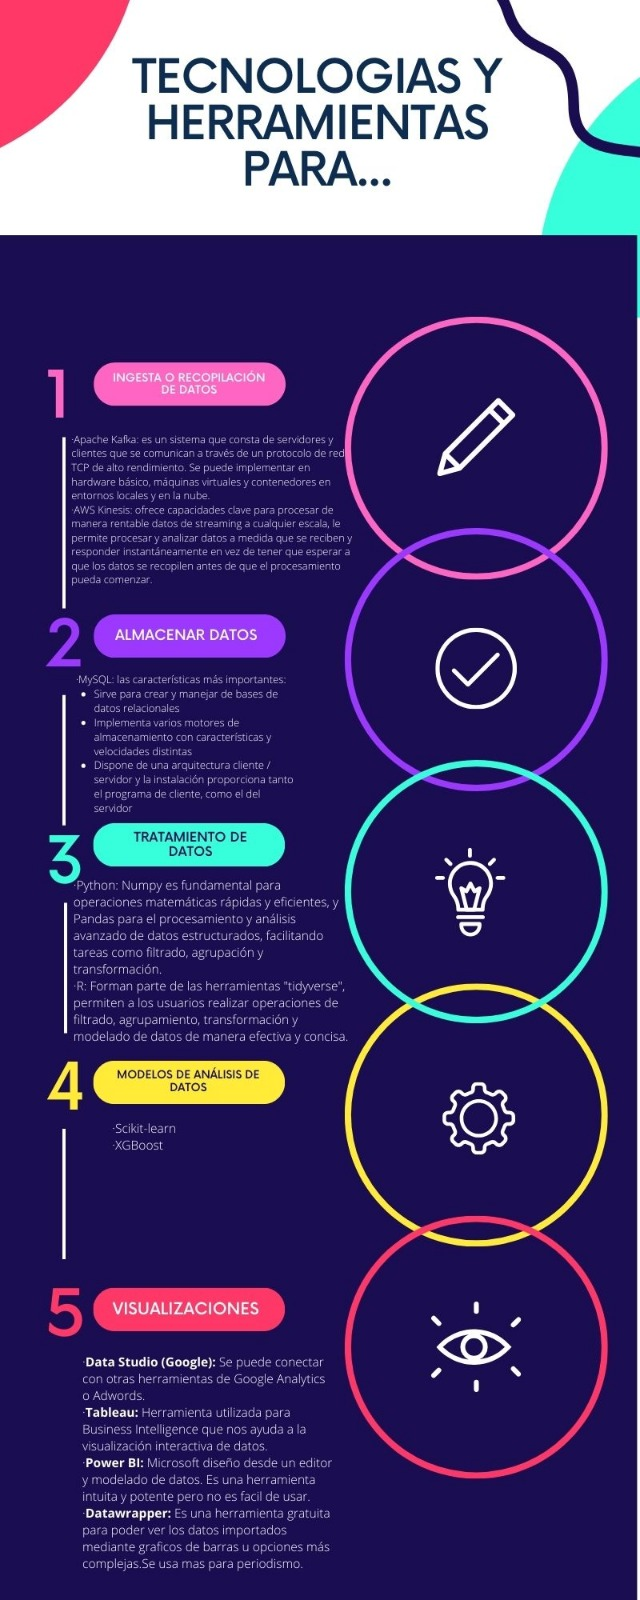

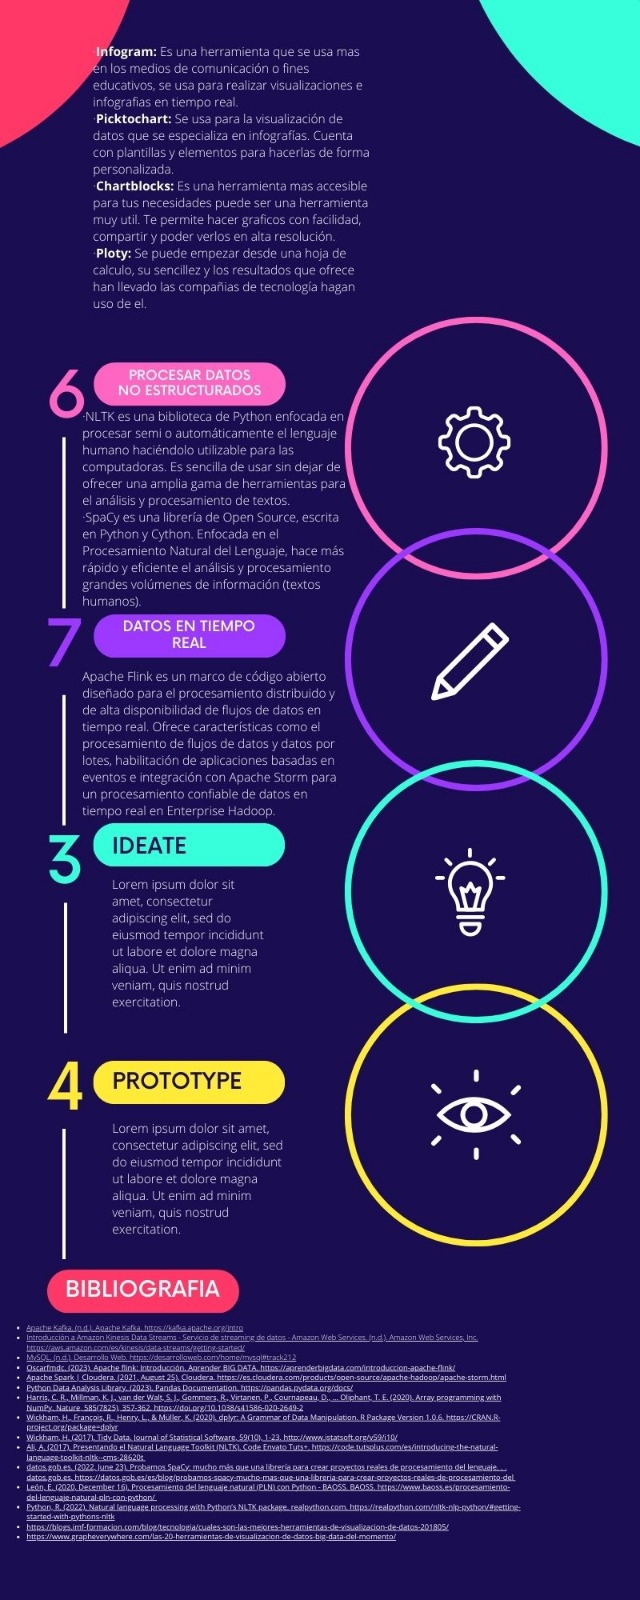

#Actividad 2

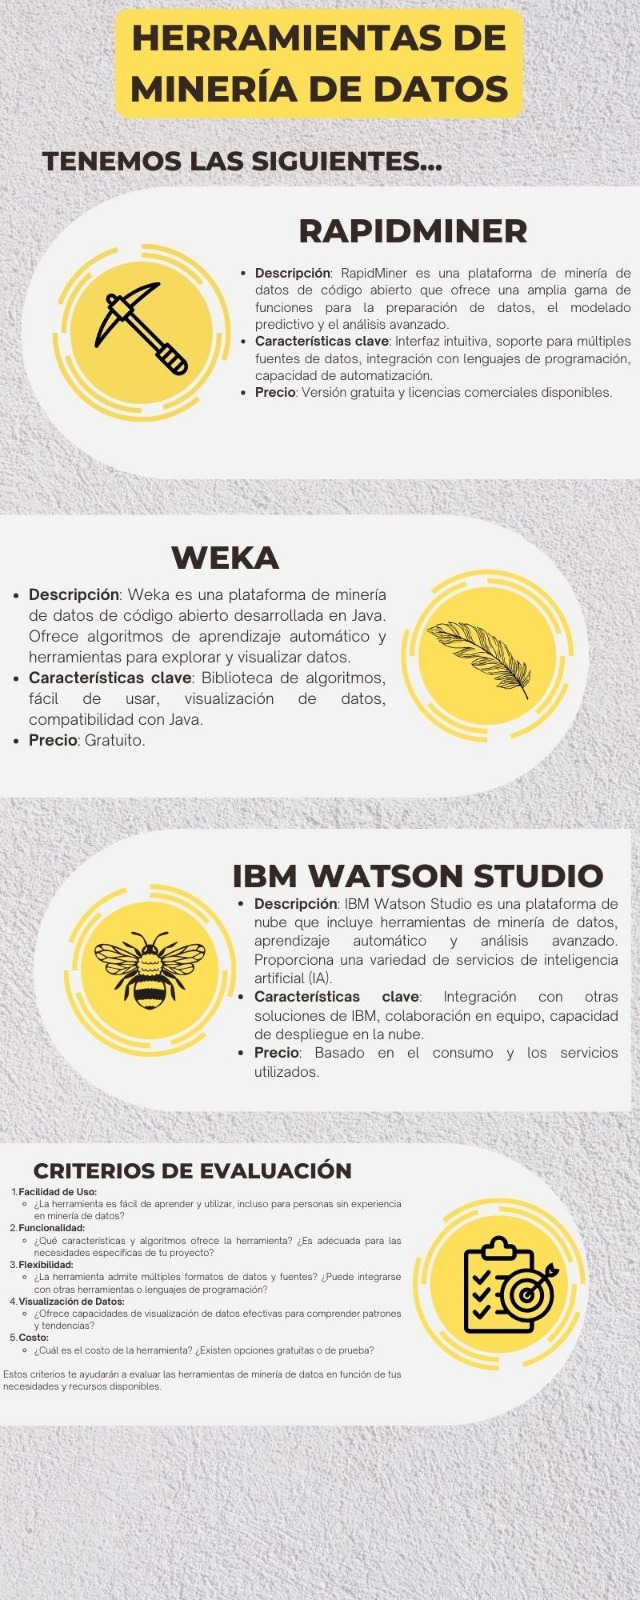

#Actividad 3

1.	Investiga sobre cada uno de los siguientes modelos de análisis de datos, utilizando al menos una fuente confiable:

a.	Supervisados

i.	Clasificación:

  	Árboles de decisión.

  	Regresión logística.

ii.	Regresión:

  	Regresión lineal.

iii.	Series de tiempo:

  	ARIMA.

b.	No supervisados

i.	Agrupamiento o clustering:

  	K-means.

ii.	Reglas de asociación:

  	A priori.
2.	Para cada uno de los modelos responde las siguientes preguntas:

•	¿Cómo funciona el algoritmo del modelo?

•	¿Cuándo se utiliza?

Supervisados:

Clasificación:
1.	Árboles de decisión:

•	Funcionamiento: Los árboles de decisión son un tipo de modelo que se utiliza para resolver problemas de clasificación. Funcionan dividiendo el conjunto de datos en subconjuntos más pequeños basados en características particulares, creando un árbol de decisiones. Cada nodo del árbol representa una pregunta sobre una característica específica, y las ramas representan las posibles respuestas a esa pregunta.

•	Cuando se utiliza: Se utiliza cuando se necesita realizar tareas de clasificación, como predecir si un correo electrónico es spam o no, identificar la especie de una planta según sus características, etc.
2.	Regresión logística:

•	Funcionamiento: La regresión logística es un modelo utilizado para problemas de clasificación binaria. Funciona utilizando una función logística para modelar la probabilidad de que una observación pertenezca a una de las dos clases. La función logística transforma una combinación lineal de las variables de entrada en un valor entre 0 y 1, que se interpreta como la probabilidad.

•	Cuando se utiliza: Se utiliza en problemas donde se necesita predecir una de dos categorías mutuamente excluyentes, como la predicción de si un cliente comprará un producto o no, la detección de fraudes en tarjetas de crédito, etc.
Regresión:
1.	Regresión lineal:

•	Funcionamiento: La regresión lineal es un modelo utilizado para predecir una variable continúa basada en una o más variables independientes. Funciona buscando la relación lineal entre las variables de entrada y la variable de salida, ajustando una línea recta (en el caso de regresión simple) o un hiperplano (en el caso de regresión múltiple) que minimiza la suma de los errores cuadráticos.

•	Cuando se utiliza: Se utiliza cuando se necesita predecir o modelar una variable numérica, como predecir el precio de una casa en función de sus características, la demanda de un producto en función de la publicidad, etc.

Series de tiempo:
1.	ARIMA (Autoregressive Integrated Moving Average):

•	Funcionamiento: ARIMA es un modelo estadístico utilizado para analizar y predecir series de tiempo. Consiste en tres componentes principales: autoregresión (AR), integración (I) y media móvil (MA). ARIMA se utiliza para modelar las relaciones y patrones en los datos de series de tiempo, incluyendo tendencias y estacionalidades.

•	Cuando se utiliza: Se utiliza para predecir valores futuros en una serie de tiempo, como pronosticar ventas mensuales, precios de acciones, o cualquier otra variable que cambie con el tiempo.
No supervisados:

Agrupamiento o clustering:
1.	K-means:

•	Funcionamiento: El algoritmo K-means es utilizado para agrupar datos en clústeres basados en similitud. Funciona asignando cada punto de datos al clúster más cercano a su centroide, que es el punto medio del clúster. Luego, recalcula los centroides y repite el proceso hasta que los clústeres convergen.

•	Cuando se utiliza: Se utiliza cuando se necesita agrupar datos similares sin etiquetas previas, como la segmentación de clientes en grupos de marketing, la detección de anomalías en sistemas de seguridad, etc.
Reglas de asociación:
1.	A priori:

•	Funcionamiento: El algoritmo A priori es utilizado para descubrir reglas de asociación en un conjunto de datos. Funciona identificando patrones de co-ocurrencia entre elementos en una base de datos. La regla más conocida es "si X, entonces Y", donde X e Y son conjuntos de elementos.

•	Cuando se utiliza: Se utiliza en aplicaciones como la recomendación de productos en línea, análisis de carritos de compra en tiendas electrónicas, y cualquier situación en la que se desee descubrir relaciones entre elementos en grandes conjuntos de datos transaccionales.


### Notebook A priori


## Introduction

This notebook aims at getting a good insight in the data for the PorteSeguro competition. Besides that, it gives some tips and tricks to prepare your data for modeling. The notebook consists of the following main sections:

1. [Visual inspection of your data](#visual_inspection)
2. [Defining the metadata](#metadata)
3. [Descriptive statistics](#descriptive_stats)
4. [Handling imbalanced classes](#imbalanced_data)
5. [Data quality checks](#data_quality)
6. [Exploratory data visualization](#eda)
7. [Feature engineering](#feat_engineering)
8. [Feature selection](#feat_selection)
9. [Feature scaling](#feat_scaling)

## Loading packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

ImportError: ignored

## Loading data

In [ ]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

<a class="anchor" id="visual_inspection"></a>

## Data at first sight

Here is an excerpt of the the data description for the competition:
* Features that belong to **similar groupings are tagged** as such in the feature names (e.g.,  ind, reg, car, calc).
* Feature names include the postfix **bin** to indicate binary features and **cat** to  indicate categorical features.
* Features **without these designations are either continuous or ordinal**.
* Values of **-1**  indicate that the feature was **missing** from the observation.
* The **target** columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [ ]:
train.head()

In [ ]:
train.tail()

We indeed see the following
* binary variables
* categorical variables of which the category values are integers
* other variables with integer or float values
* variables with -1 representing missing values
* the target variable and an ID variable

Let's look at the number of rows and columns in the train data.

In [ ]:
train.shape

We have 59 variables and 595.212 rows. Let's see if we have the same number of variables in the test data.<br>
Let's see if there are duplicate rows in the training data.

In [ ]:
train.drop_duplicates()
train.shape

No duplicate rows, so that's fine.

In [ ]:
test.shape

We are missing one variable in the test set, but this is the target variable. So that's fine.<br>
Let's now invesigate how many variables of each type we have.

So later on we can create dummy variables for the 14 categorical variables. The *bin* variables are already binary and do not need dummification.

In [ ]:
train.info()

Again, with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1. We'll look into that later.

<a class="anchor" id="metadata"></a>

## Metadata
To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling, ...

Concretely we will store:
- **role**: input, ID, target
- **level**: nominal, interval, ordinal, binary
- **keep**: True or False
- **dtype**: int, float, str

In [ ]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = train[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

Example to extract all nominal variables that are not dropped

In [ ]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Below the number of variables per role and level are displayed.

In [ ]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

<a class="anchor" id="descriptive_stats"></a>

## Descriptive statistics

We can also apply the *describe* method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

### Interval variables

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

#### reg variables
- only ps_reg_03 has missing values
- the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use.

#### car variables
- ps_car_12 and ps_car_15 have missing values
- again, the range differs and we could apply scaling.

#### calc variables
- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three *_calc* variables have very similar distributions


**Overall**, we can see that the range of the interval variables is rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?


### Ordinal variables

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

- Only one missing variable: ps_car_11
- We could apply scaling to deal with the different ranges

### Binary variables

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

- A priori in the train data is 3.645%, which is **strongly imbalanced**.
- From the means we can conclude that for most variables the value is zero in most cases.

<a class="anchor" id="imbalanced_data"></a>

## Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice.
Two possible strategies to deal with this problem are:
* oversampling records with target=1
* undersampling records with target=0

There are many more strategies of course and MachineLearningMastery.com gives a [nice overview]((https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).
As we have a rather large training set, we can go for **undersampling**.

In [ ]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

<a class="anchor" id="data_quality"></a>

## Data Quality Checks

### Checking missing values
Missings are represented as -1

In [ ]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

- **ps_car_03_cat and ps_car_05_cat** have a large proportion of  records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- **ps_reg_03** (continuous) has missing values for 18% of all records. Replace by the mean.
- **ps_car_11** (ordinal) has only 5 records with misisng values. Replace by the mode.
- **ps_car_12** (continuous) has only 1 records with missing value. Replace by the mean.
- **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.

In [ ]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables
Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Only **ps_car_11_cat** has many distinct values, although it is still reasonable.

**EDIT:** [nickycan](https://www.kaggle.com/nickycan) made an excellent remark on the fact that my first solution could lead to data leakage. He also pointed me to another kernel made by [oliver](https://www.kaggle.com/ogrellier) which deals with that. I therefore replaced this part with the kernel of oliver. All credits go to him. It is so great what you can learn by participating in the Kaggle competitions :)

In [ ]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [ ]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                             test["ps_car_11_cat"],
                             target=train.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

<a class="anchor" id="eda"></a>

## Exploratory Data Visualization

### Categorical variables
Let's look into the categorical variables and the proportion of customers with target = 1

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

As we can see from the variables **with missing values**,  it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

### Interval variables
Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. The code below is based on [an example by Michael Waskom](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [ ]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a *pairplot* to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.<br>
**NOTE**: I take a sample of the train data to speed up the process.

In [ ]:
s = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03
As the regression line shows, there is a linear relationship between these variables. Thanks to the *hue* parameter we can see that the regression lines for target=0 and target=1 are the same.

In [ ]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_13

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_14

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 and ps_car_15

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Allright, so now what? How can we decide which of the correlated variables to keep? We could perform Principal Component Analysis (PCA) on the variables to reduce the dimensions. In the AllState Claims Severity Competition I made [this kernel](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca) to do that. But as the number of correlated variables is rather low, we will let the model do the heavy-lifting.

### Checking the correlations between ordinal variables

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

For the ordinal variables we do not see many correlations. We could, on the other hand, look at how the distributions are when grouping by the target value.

<a class="anchor" id="feat_engineering"></a>

## Feature engineering

### Creating dummy variables
The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

So, creating dummy variables adds 52 variables to the training set.

### Creating interaction variables

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

This adds extra interaction variables to the train data. Thanks to the *get_feature_names* method we can assign column names to these
new variables.

<a class="anchor" id="feat_selection"></a>

## Feature selection

### Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: **VarianceThreshold**. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [ ]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

Sklearn also comes with other [feature selection methods](http://scikit-learn.org/stable/modules/feature_selection.html). One of these methods is *SelectFromModel* in which you let another classifier select the best features and continue with these. Below I'll show you how to do that with a Random Forest.

### Selecting features with a Random Forest and SelectFromModel
Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

> The code in the cell below is borrowed from the [GitHub repo of Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb). This repo contains code samples of his book *Python Machine Learning*, which is an absolute must to read.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))


With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the *get_support* method we can then limit the number of variables in the train data.

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])


In [ ]:
train = train[selected_vars + ['target']]

<a class="anchor" id="feat_scaling"></a>

## Feature scaling
As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

## Conclusion
Hopefully this notebook helped you with some tips on how to start with this competition. Feel free to vote for it. And if you have questions, post a comment.

## Este codigo

se encarga de realizar varias transformaciones en las características del conjunto de datos, incluida la creación de variables ficticias, variables de interacción y la selección de características importantes, para preparar los datos para el modelado de machine learning.

### REGRESION LOGISTICA

#               MODELO DE PREDICCION SOBREVIVIENTES DEL TITANIC

El siguiente ejercicio busca analizar de manera general el naufragio del titanic en las siguientes fases:

* Creacion de los Dataframe's
* Analisis preliminar por medio de visualizacion de datos
* Limpieza y preparacion de datos
* Retiro de columnas de poca importancia
* Creacion del modelo ML
* Entrenamiento del modelo
* Zona de evaluacion de la prediccion
* Zona de metricas y resultados finales (Regresion logistica y bosques aleatorios)



# Importamos librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Vamos a cargar los datos en un DF llamado Train

In [ ]:
train = pd.read_csv("../input/train.csv")
df_test=pd.read_csv("../input/test.csv")
train.info()

In [ ]:
train.drop([889,890],inplace=True)

# Ahora vamos a preparar los datos buscando los datos faltantes

In [ ]:
train.isnull().tail() # obtenemos una matrix boleana donde se muestra datos nulos

# Como ya tenemos los datos nulos vamos a hacer un mapa de calor para tener una mejor visualizacion

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # eliminamos eje Y , leyenda de las barras

# Visualizamos rapidamente cuantos sobrevientes hubieron

In [ ]:
sns.set_style('whitegrid') # Estilo de la grilla
sns.countplot(x='Survived',data=train,palette='viridis')

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='viridis') # si deseamos hacer un matizado con el genero

# ANALISIS GENERO:
Es muy facil observar que la mayoria de personas que no sobrevivieron eran hombres y a su vez las personas que sobrevivieron en su mayoria (casi el doble ) eran mujeres

In [ ]:
# Ahora hagamos el mismo analisis pero con la clase social

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

# ANALISIS CLASE SOCIAL:
En este grafico podemos observar que la mayoria de personas que perdieron la vida pertenecian a la 3ra clase, a su vez las personas que sobrevivieron estuvo mas equilibrado pero con una tendencia superior hacia los de 1ra clase seguido de los sobrevivientes de 3ra clase

# Numero de pasajeros por clase

In [ ]:
train['Pclass'].value_counts() # Para evaluar el numero de pasajeros de la muestra

In [ ]:
sns.countplot(x='Pclass',data=train)

# Limpiando nuestros datos

En esta fase vamos a preparar nuestros datos para los algoritmos de machine learning , como primer paso vamos a realizar un diagrama de cajas para la edad y de esa manera observar el promedio de la edad por clase social

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# Analisis :

Podemos observar que la edad promedio por clase social es :

* 1ra clase la edad promedio es 37 años aprox.
* 2da clase la edad promedio es 29 años aprox.
* 3ra clase la edad promedio es 24 años aprox.

In [ ]:
# Creamos la funcion de imputacion de datos para la edad

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

# Aplicamos la funcion para limpiar datos de edad y actualizarlos

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
# Aplicamos nuevamente el heatmap para verificar si los datos fueron limpiados correctamente

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # de esta manera se observa los missing Data

In [ ]:
# como podemos analizar hay muchos datos faltantes en las cabinas y quizas no sea un informacion importante
# entonces lo que hacemos es suprimir esta columna

In [ ]:
train.drop('Cabin',axis=1,inplace=True) # recordar que el implace es para hacer un guardado definitivo

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # de esta manera se observa los missing Data

# Retiro de las variables que no tienen importancia para nuestra prediccion

Realizamos el retiro de las variables que no tienen importancia dentro del estudio o no son numericos

In [ ]:
train.drop(['Name','Embarked','SibSp','Ticket','Parch','Fare','Age'],axis=1,inplace=True)

In [ ]:
train.head()

# Conversion de las variables categoricas

Tendremos que convertir características categóricas a variables ficticias utilizando pandas! De lo contrario, nuestro algoritmo de aprendizaje automático no podrá tomar directamente esas características como entradas

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # con pandas caracterizamos las variables categoricas
#clase = pd.get_dummies(train['Pclass'],drop_first=True) # con pandas caracterizamos las variables categoricas

In [ ]:
train = pd.concat([train,sex],axis=1)  # Realizamos concatenación para ingresar las variables convertidas

In [ ]:
train.head()

In [ ]:
train.drop(['Sex'],axis=1,inplace=True)

In [ ]:
train.head()

# Sobrevivientes por clases ( porcentaje %)

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# # Construyendo el modelo de regresion :

Una vez ya tengamos nuestros datos caracterizados y limpios , procedemos  a dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba

In [ ]:
X=train.drop('Survived',axis=1)
y=train['Survived']
X_test  = df_test.drop("PassengerId",axis=1).copy()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=101)

# Prediccion del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrmodel = LogisticRegression() # Creamos la instancia
lrmodel.fit(X_train,y_train)   # Ajustamos el modelo con los datos de entrenamiento

In [ ]:
prediccion=lrmodel.predict(X_test) # Prediccion de los datos

In [ ]:
lrmodel.score(X_train, y_train)
logistic_score = round(lrmodel.score(X_train, y_train)*100,2)
logistic_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
pred_rf = ranfor.predict(X_test)

ranfor.score(X_train, y_train)

ranfor_score = round(ranfor.score(X_train, y_train)*100,2)
ranfor_score

In [ ]:
df_final = pd.DataFrame({"Models": [ 'Logistic Regression',  'Random Forest'],
                       "Score": [logistic_score, ranfor_score]})

In [ ]:
df_final.sort_values(by= "Score", ascending=False)

# Evaluaciones de los modelos

In [ ]:
from sklearn.metrics import classification_report # Nos indicara la precision de nuestro modelo
from sklearn.metrics import confusion_matrix

In [ ]:
print (classification_report(y_test,prediccion))

In [ ]:
confusion_matrix(y_test,prediccion)

In [ ]:

print (classification_report(y_test,pred_rf))

In [ ]:
confusion_matrix(y_test,pred_rf)

In [ ]:
df_test.drop(['Name','Embarked','SibSp','Ticket','Parch','Fare','Age','Cabin','Sex','Pclass'],axis=1,inplace=True)

In [ ]:
df_test.head()

# Archivo con prediccion por Regresion Logistica


In [ ]:
final_report_LogR = pd.DataFrame({"PassengerId": df_test["PassengerId"],
                       "Survived" : prediccion})


In [ ]:
final_report_LogR.head()

In [ ]:
final_report_LogR.to_csv('final_Pred_LogR.csv', index=False)

# Archivo con prediccion por Random Forest

In [ ]:
final_report_RanFor = pd.DataFrame({"PassengerId": df_test["PassengerId"],
                       "Survived" : pred_rf})


In [ ]:
final_report_RanFor.head()

In [ ]:
final_report_RanFor.to_csv('final_Pred_RanFor', index=False)

#### Este código muestra un flujo de trabajo típico de análisis de datos y creación de modelos de machine learning para predecir la supervivencia de pasajeros en el Titanic. Se utilizan dos modelos diferentes regresión logística y bosques aleatorios y se evalúan sus resultados.

# ARIMA

# INTRODUCTION
<a href="http://ibb.co/hxXdKx"><img src="http://preview.ibb.co/cgA9Rc/ww2.png" alt="ww2" border="0"></a>
* Hi guys, I hope you are doing fine.
* In this kernel, we use multipla data sources that are **aerial bombing  operations** and **weather conditions in world war 2**.
* After this point, I will use acronym ww2 for world war 2.
* We will start with **data description and cleaning**, then we will visualize our data to understand better. These processes can be called **EDA (Exploratory Data Analysis)**.
* After that, we will focus on **time series prediction** to predict when bombing operations are done.
* For time series prediction, we will use **ARIMA** method that will be a tutorial.

 <br> <font color='blue'> Content:
    * [Load the Data](#1)
    * [Data Description](#2)
    * [Data Cleaning](#3)
    * [Data Visualization](#4)
    * [Time Series Prediction with ARIMA](#5)
        * [ What is Time Series ?](#6)
        * [Stationarity of a Time Series](#7)
        * [Make a Time Series Stationary](#8)
            * Moving Average method
            * Differencing method
        * [Forecasting a Time Series](#9)
    * [Conclusion](#10)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# import warnings library
import warnings
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

<a id="1"></a> <br>
## Load the Data
* As I mentioned at introduction, we use multiple data sources.
    * Aerial Bombing Operations in WW2
        * Shortly, this data includes bombing operations. For example, USA who use ponte olivo airfield bomb Germany (Berlin) with A36 air craft in 1945.
    * Wether Conditions in WW2
        * Shortly, weather conditions during ww2. For example, according to george town weather station, average temperature is 23.88 in 1/7/1942.
        * This data set has 2 subset in it. First one includes weather station locations like country, latitude and longitude.
        * Second one includes measured min, max and mean temperatures from weather stations.

In [ ]:
# bombing data
aerial = pd.read_csv("../input/world-war-ii/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("../input/weatherww2/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("../input/weatherww2/Summary of Weather.csv")

<a id="2"></a> <br>
## Data Description
I only explain data features that we will use in this kernel.
* **Aerial bombing Data description:**
    * Mission Date: Date of mission
    * Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
    * Country: Country that makes mission or operation like USA
    * Air Force: Name or id of air force unity like 5AF
    * Aircraft Series: Model or type of aircraft like B24
    * Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
    * Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
    * Takeoff Location: takeoff region Sicily
    * Takeoff Latitude: Latitude of takeoff region
    * Takeoff Longitude: Longitude of takeoff region
    * Target Country: Target country like Germany
    * Target City: Target city like Berlin
    * Target Type: Type of target like city area
    * Target Industry: Target industy like town or urban
    * Target Priority: Target priority like 1 (most)
    * Target Latitude: Latitude of target
    * Target Longitude: Longitude of target
* **Weather Condition data description:**
    * Weather station location:
        * WBAN: Weather station number
        * NAME: weather station name
        * STATE/COUNTRY ID: acronym of countries
        * Latitude: Latitude of weather station
        * Longitude: Longitude of weather station
    * Weather:
        * STA: eather station number (WBAN)
        * Date: Date of temperature  measurement
        * MeanTemp: Mean temperature

<a id="3"></a> <br>
## Data Cleaning
* Aerial  Bombing data includes a lot of NaN value. Instead of usign them, I drop some NaN values. It does not only remove the uncertainty but it also easa visualization process.
    * Drop countries that are NaN
    * Drop if target longitude is NaN
    * Drop if takeoff longitude is NaN
    * Drop unused features
* Weather Condition data does not need any cleaning. According to exploratory data analysis and visualization, we will choose certain location to examine deeper. However, lets put our data variables what we use only.

In [ ]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [ ]:
aerial.info()

In [ ]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

In [ ]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<a id="4"></a> <br>
## Data Visualization
* Lets start with basics of visualization that is understanding data.
    * How many country which attacks
    * Top target countries
    * Top 10 aircraft series
    * Takeoff base locations (Attacjk countries)
    * Target locations (If you do not understand methods of pyplot look at my pyplot tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners)
    * Bombing paths
    * Theater of Operations
    * Weather station locations

In [ ]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

In [ ]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* **Most used air craft: A36**
    * <a href="http://imgbb.com/"><img src="http://image.ibb.co/b3x66c/a36.png" alt="a36" border="0"></a>
* Now lets visualize take off bases of countries who attack
    * In plot below, blue color draw the attention, it is USA and red color is Great Britain

In [ ]:
aerial.head()

In [ ]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Okey, now lets visualize bombing paths which country from which take off base bomb the which countries and cities.

In [ ]:
# Bombing paths
# trace1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict(
            size=5,
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]
# trace2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict(
            size=1,
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]

# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )

layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)

fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

As you ca see from bombing paths, most of the bombing attack is done in Mediterranean theater of operations.
**Theater of Operations:**
* ETO: European Theater of Operations
* PTO: Pasific Theater of Operations            
* MTO: Mediterranean Theater of Operations         
* CBI: China-Burma-India Theater of Operations                
* EAST AFRICA: East Africa Theater of Operations   
<a href="http://imgbb.com/"><img src="http://image.ibb.co/bYvFzx/mto.png" alt="mto" border="0"></a>

In [ ]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

* Weather station locations are in below

In [ ]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* Lets focus **USA and BURMA war**
* In this war USA bomb BURMA( KATHA city) from 1942 to 1945.
* The closest weather station to this war is **BINDUKURI** and it has temperature record from 1943 to 1945.
* Now lets visualize this situation. But before visualization, we need to make date features date time object.

In [ ]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()


* As you can see, we have temperature measurement from 1943 to 1945.
* Temperature ossilates between 12 and 32 degrees.
* Temperature of  winter months is colder than  temperature of  summer months.

In [ ]:
aerial = pd.read_csv("../input/world-war-ii/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]


In [ ]:
# I get very tired while writing this part, so sorry for this dummy code But I guess you got the idea
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)




* Green line is mean temperature that is measured in Bindukuri.
* Blue markers are bombing dates and bombing date temperature.
* As it can be seen from plot, USA bomb at high temperatures.
    * The question is that can we predict future weather and according to this prediction can we know whether bombing will be done or not.
    * In order to answer this question lets first start with time series prediction.
  

<a id="5"></a> <br>
## Time Series Prediction with ARIMA
* We will use most used method ARIMA
* ARIMA :  AutoRegressive Integrated Moving Average. I will explain it detailed  at next parts.
* The way that we will follow:
    * What is Time Series ?
    * Stationarity of a Time Series
    * Make a Time Series Stationary?
    * Forecasting a Time Series

<a id="6"></a> <br>
### What is time series?
* Time series is a collection of data points that are collected at constant time intervals.
* It is time dependent.
* Most of time series have some form of **seasonality trends**. For example, if we sale ice cream, most probably there will be higher sales in summer seasons. Therefore, this time series has seasonality trends.
* Another example, lets think we dice one time every day during 1 year. As you guess, there will be no scenario like that number six is appeared mostly in summer season or number five is mostly appeared in January. Therefore, this time series does not have seasonality trends.


<a id="7"></a> <br>
### Stationarity of a Time Series
* There are three basic criterion for a time series to understand whether it is stationary series or not.
    * Statistical properties of time series such as mean, variance should remain constant over time to call **time series is stationary**
        * constant mean
        * constant variance
        * autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.
* Lets visualize and check seasonality trend of our time series.

In [ ]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


* As you can see from plot above, our time series has seasonal variation. In summer, mean temperature is higher and in winter mean temperature is lower for each year.
* Now lets check stationary of time series. We can check stationarity using the following methods:
    * Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
    * Dickey-Fuller Test: The test results comprise of a **Test Statistic** and some **Critical Values** for difference confidence levels. If the **test statistic** is less than the **critical value**, we can say that time series is stationary.

In [ ]:
# adfuller library
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)


* Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* Third one is that If the **test statistic** is less than the **critical value**, we can say that time series is stationary. Lets look:
    * test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (no stationary)
* As a result, we sure that our time series is not stationary.
* Lets make time series stationary at the next part.

<a id="8"></a> <br>
### Make a Time Series Stationary?
* As we mentioned before, there are 2  reasons behind non-stationarity of time series
    * Trend: varying mean over time. We need constant mean for stationary of time series.
    * Seasonality: variations at specific time. We need constant variations for stationary of time series.
* First solve **trend(constant mean)** problem
    * Most popular method is moving average.
        * Moving average: We have window that take the average over the past 'n' sample. 'n' is window size.

In [ ]:
# Moving average method
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

* Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)
* We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.
    * Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.


In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

* Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
* Second one is constant variance. It looks like constant. (yes stationary)
* The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

<a id="9"></a> <br>
### Forecasting a Time Series
* We learn two different methodsthat are **moving average and differencing** methods to avoid trend and seasonality problem
* For prediction(forecasting) we will use ts_diff time series that is result of differencing method. There is no reason I only choose it.
* Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.
    * AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use  x(t-1), x(t-2) and x(t-3) to predict x(t)
    * I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0
    * MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.
* (p,d,q) is parameters of ARIMA model.
* In order to choose p,d,q parameters we will use two different plots.
    * Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.
    * Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.

In [ ]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
    * Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
    * Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.
* Now lets use (1,0,1) as parameters of ARIMA models and predict  
    * ARIMA: from statsmodels libarary
    * datetime: we will use it start and end indexes of predict method

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

* lets predict and visualize all path and find mean squared error

In [ ]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()

<a id="10"></a> <br>
# Conclusion
* In this tutorial, I want ot make tutorial about ARIMA and make some visualization before it.
* We learn how to make map plots with pyplot.
* We learn how to make time series forecast.
* **If you have any question advise or feedback, I will be very happy to hear it**

### Este código es un ejemplo de análisis de datos exploratorios y predicción de series de tiempo utilizando el método ARIMA en el contexto de datos históricos de operaciones de bombardeo aéreo y condiciones climáticas durante la Segunda Guerra Mundial. El autor utiliza visualizaciones y técnicas estadísticas para comprender los datos y hacer predicciones sobre las temperaturas medias.

#Actividad 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Actividad 4 video
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_CttrTb6_9A?si=V_Jx4YyAxjJKKqd7" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


#Actividad 5

Actividad 5

In [ ]:
print ("Hello, World");


Hello, World


# Preparación de los Datos
## Curso Ingeniería Masiva de Datos
## TecMilenio


- Objetivo:
   
    - Mostrar lo que se hace cuando se prepara a los datos
    - En proyectos reales entre el 50% y 80% del tiempo se emplea en tareas de preparación de los datos para empezar a modelar
    
  
- Librerías de Python usadas:
    - pandas
    - Matplotlib
    - Numpy
   

Dataset para el ejemplo tomado de : https://archive.ics.uci.edu/ml/datasets/Adult

1. Limpieza de Datos
    1. Manejo de diferentes tipos de datos
    2. Manejo de datos faltantes
2. Exploración de los Datos
    1. Descripción de los datos
    2. Gráficas de las distribuciones de los Datos
    3. Detección de valores atípicos
3. Creando los Datos para hacer el Modelo
    1. Relaciones entre variables
    2. Selección de variables

## Modelo

Un modelo que dados los atributos sobre una persona haga una predicción para saber s si su ingreso es <= 50K o> 50K

## Datos

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.represents final weight, which is the number of units in the target population that the responding unit represents
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.7



In [ ]:
# Importando librerías y datos
import numpy as np
import pandas as pd

df = pd.read_csv('drive/MyDrive/adult.csv',na_values=['#NAME?'])

In [ ]:
print(df.head(5))


    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

In [ ]:
df.shape

(5000, 15)

In [ ]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [ ]:
type(df['education'][0])

str

In [ ]:
# Ver la variable 'income' el tipo y cuantos hay de cada tipo
print(df['sex'].value_counts())

Male      3332
Female    1621
Name: sex, dtype: int64


In [ ]:
# Asignar el valor de 0 Si income <=50K y de 1 Si 1 income >50K
df['sex'] = [0 if x == 'Male' else 1 for x in df['sex']]

# Crear dos DataFrames X con variables indpendientes o features y uno y con variable dependiente , la que vamos a predecir
X = df.drop('sex', 1)
Y = df.sex

<ipython-input-89-3c4c697a49f0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('sex', 1)


In [ ]:
print(X.head(5))

    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race  capital_gain  \
0       Never-married       Adm-clerical  Not-in-family  White          2174   
1  Married-civ-spouse    Exec-managerial        Husband  White             0   
2            Divorced  Handlers-cleaners  Not-in-family  White             0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black             0   
4  Married-civ-spouse     Prof-specialty           Wife  Black             0   

   capital_loss  hours_per_week native_country income  
0             0              40  United-States  <=50K  
1             0 

In [ ]:
print(Y.head(5))

0    0
1    0
2    0
3    1
4    1
Name: sex, dtype: int64


## 1. Limpieza de Datos

### A. Manejo de diferentes tipos de datos

- Hay tres tipos principales de datos:
    - Cuantitativo, Numérico: ingreso, edad
    - Cualitativo, Categórico:  género, nacionalidad
    - Cualitativo, Categórico Ordinal: bajo medio alto
    
- Los modelos sólo pueden manejar variables cuantitativas numéricas
- Se deben convertir las variables cualitativas ó categóricas en variables numéricas
    - Crear variables extra
    - Transformar una variable cualitativa o categórica en un conjunto de variables extra, cada una representando una categoría única
    - En el conjunto de variables extra, 1 indica que la observación pertenece a esa categoría
    

In [ ]:
# Education es una variable cualitativa
print(X['education'].head(20))

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
5          Masters
6              9th
7          HS-grad
8          Masters
9        Bachelors
10    Some-college
11       Bachelors
12       Bachelors
13      Assoc-acdm
14       Assoc-voc
15         7th-8th
16         HS-grad
17         HS-grad
18            11th
19         Masters
Name: education, dtype: object


In [ ]:
# Ver las caterorías de las variables categoricas o cualitativas

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print('Variable ''{col_name} tiene {unique_cat} categorías'.format(col_name=col_name, unique_cat=unique_cat))


Variable workclass tiene 8 categorías
Variable education tiene 17 categorías
Variable marital_status tiene 7 categorías
Variable occupation tiene 15 categorías
Variable relationship tiene 6 categorías
Variable race tiene 6 categorías
Variable native_country tiene 40 categorías
Variable income tiene 2 categorías


In [ ]:
# Use get_dummies de pandas para crear las variables dummies extra para representar a las variable cualitativa como numéricas
# Otra opción es usar  OneHotEncoder de la librería:  sci-kit learn
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  ?  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0  0           0          0   
1     0     0     0        0        0        0    0  0           0          0   
2     0     0     0        0        0        0    0  0           0          0   
3     0     1     0        0        0        0    0  0           0          0   
4     0     0     0        0        0        0    0  0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4       

In [ ]:
# Para ver las categorías de 'native_country' y vemos que es dominante la de Unites States
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
Germany            22
El-Salvador        16
Puerto-Rico        16
England            16
China              15
Name: native_country, dtype: int64


In [ ]:
# Podemos hacer que la baja frecuencia de las otras queden clasificadas como "Other"
X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: native_country, dtype: int64


In [ ]:
# Crear toda la lista de variables categóricas para transformarlas a numéricas
# Aqui cambiamos income por sex
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'income', 'native_country']

In [ ]:
# Función para llamar get dummies c
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [ ]:
X = dummy_df(X, todummy_list)
print(X.head(5))

<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)
<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)
<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)
<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)
<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)
<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a futur

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0          2174             0              40   
1  50.0   83311.0           13.0             0             0              13   
2  38.0  215646.0            9.0             0             0              40   
3  53.0  234721.0            7.0             0             0              40   
4  28.0  338409.0           13.0             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0            0                      0                    0                  0   
1            0                      0                    0                  0   
2            0                      0                    0                  1   
3            0                      0                    0                  1   
4            0                      0                    0                  1   

   ...  relationship_Wife  race_

<ipython-input-98-99b5fe6a7de0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x, 1)


### B. Manejo de datos faltantes

- Los modelos no pueden manejar datos faltantes


- La solución más simple
    - Eliminar observaciones / características que tienen datos faltantes
    

- Pero, eliminar datos faltantes puede presentar muchos problemas
    - Datos faltantes están distribuidos al azar y son muchos : posiblemente pierda muchos de sus datos
    - Datos faltantes no están distribuidos al azar y son muchos : además de perder datos, también está introduciendo posibles sesgos


- Una solución alternativa es utilizar la imputación.
    - Reemplace el valor faltante con otro valor
    - Estrategias: media, mediana, valor de frecuencia más alta de una variable dada
    
  

In [ ]:
# Cuantos son datos faltantes?
X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                  107
education_num            57
age                      48
native_country_Other      0
income_>50K               0
dtype: int64

In [ ]:
!pip install scikit-learn==0.20.4

  Using cached scikit-learn-0.20.4.tar.gz (11.7 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
# Para Imputar / Reemplazar los valores faltantes se usa Imputer de sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [ ]:
#Ahora volvemos a verificar como los nulos se han reemplazado con un valor
X.isnull().sum().sort_values(ascending=False).head()

age                           0
occupation_Farming-fishing    0
occupation_Protective-serv    0
occupation_Prof-specialty     0
occupation_Priv-house-serv    0
dtype: int64

## 2. Exploration de los Datos
- Entender el problema y los datos es extremadamente importante para construir modelos
- Se hace lo que se conoce como Análisis Exploratorio de los Datos para explorar sus datos entenderlos y tomar mejores decisiones al modelar

### A.Descripción de los Datos

In [ ]:
X.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,income_<=50K,income_>50K,native_country_Other,native_country_United-States
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.571200,1.907303e+05,10.079400,1033.640200,93.696800,40.519000,0.066200,0.029200,0.065800,0.687000,...,0.04900,0.009600,0.029000,0.098600,0.005800,0.804200,0.755800,0.244200,0.107000,0.893000
std,13.517776,1.054410e+05,2.520787,7051.802077,410.801418,12.109193,0.248656,0.168384,0.247957,0.463761,...,0.21589,0.097518,0.167823,0.298154,0.075944,0.396855,0.429655,0.429655,0.309144,0.309144
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.186872e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,37.000000,1.795330e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,47.000000,2.401560e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B.Gráficas de las distribuciones de los Datos

In [ ]:
# Use pyplot de matplotlib para hacer histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title('Histogram of ''{var_name}'.format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frecuency')
    plt.show()

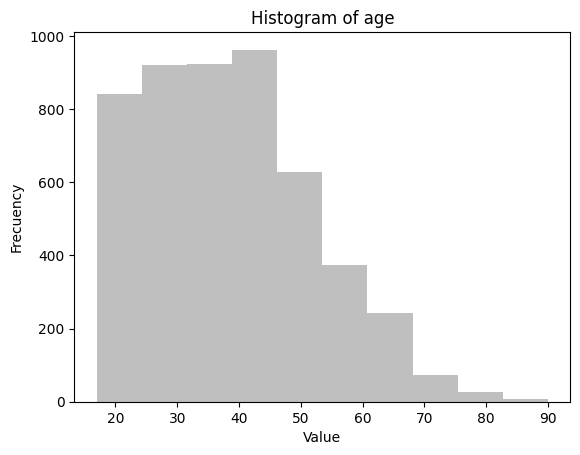

In [ ]:
plot_histogram(X['age'])

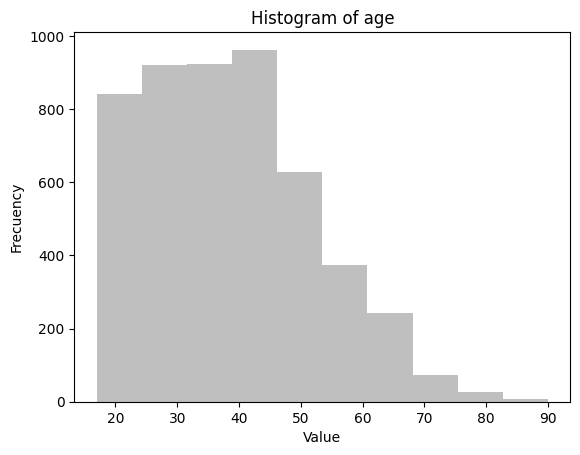

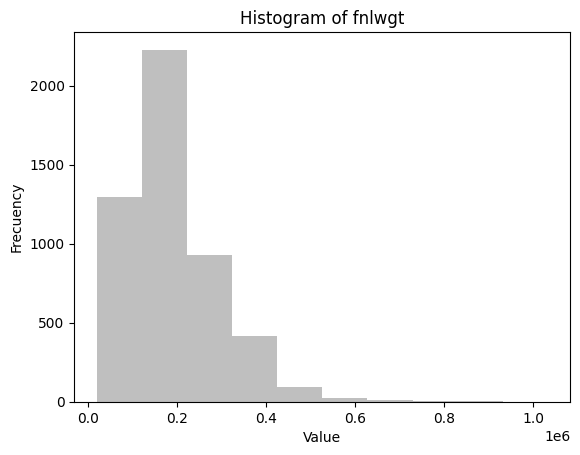

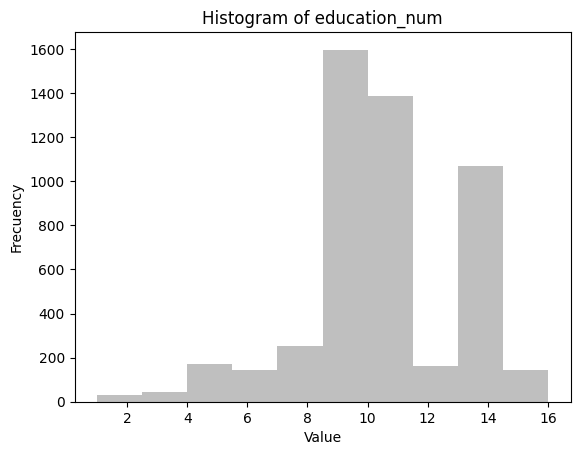

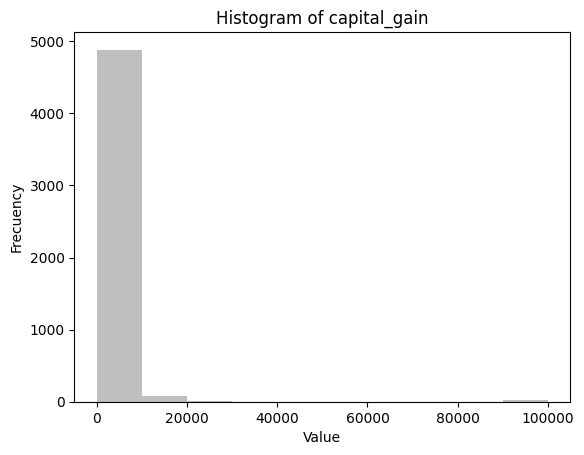

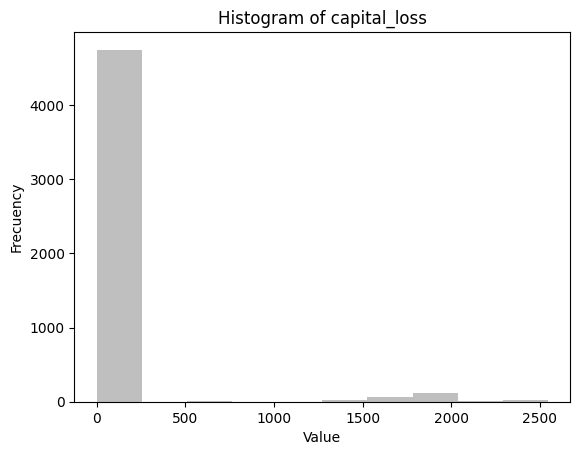

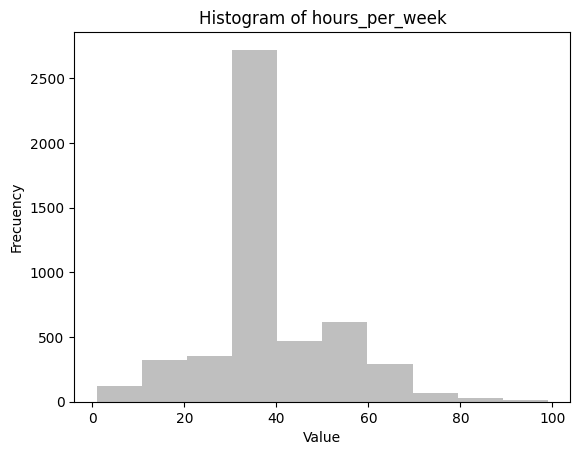

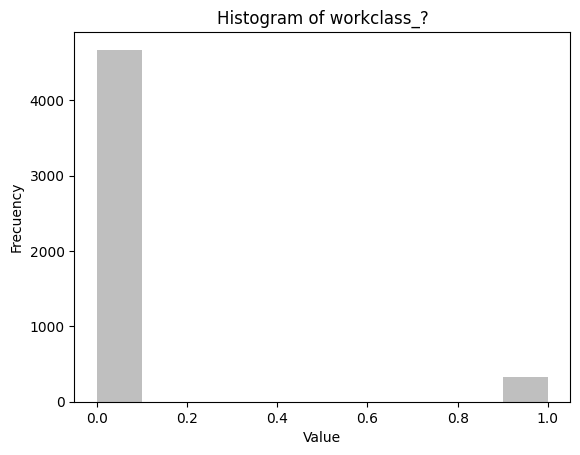

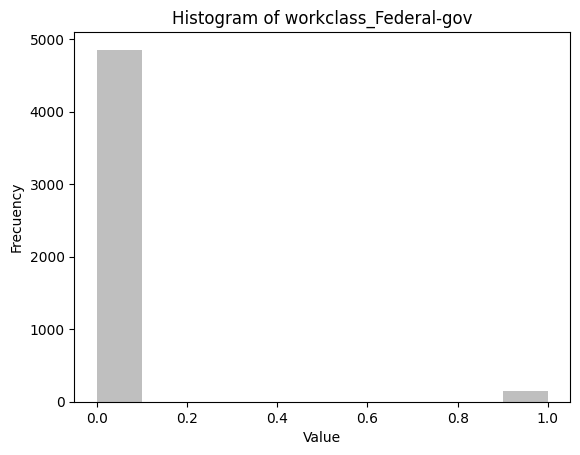

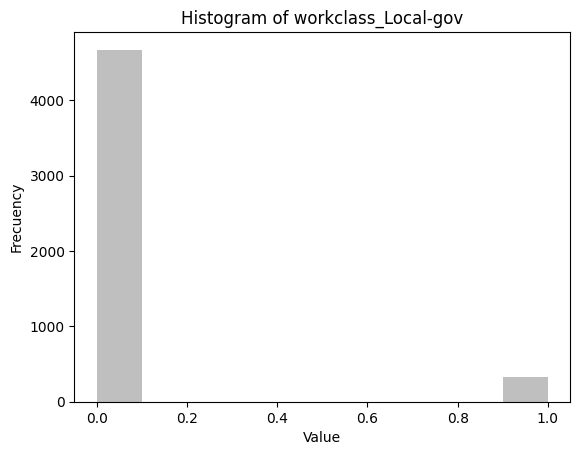

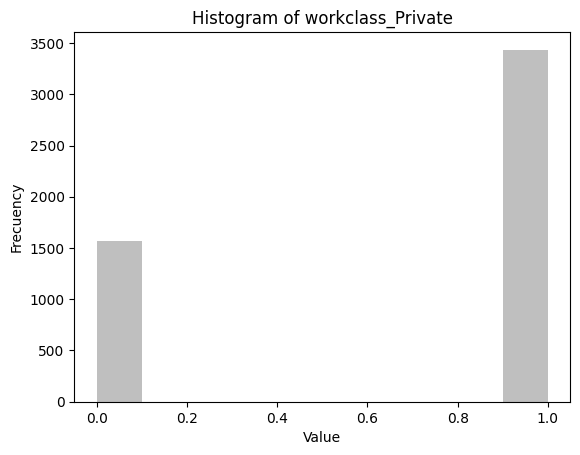

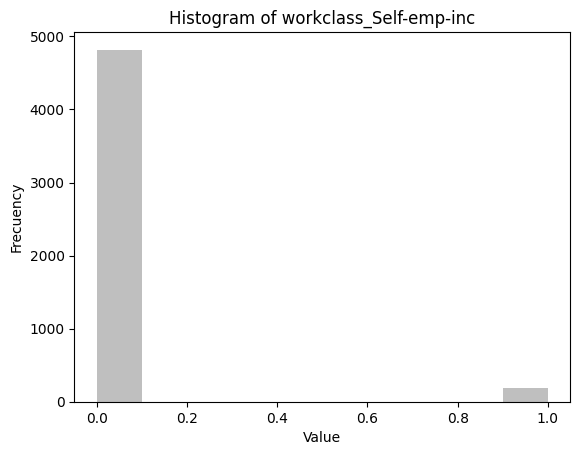

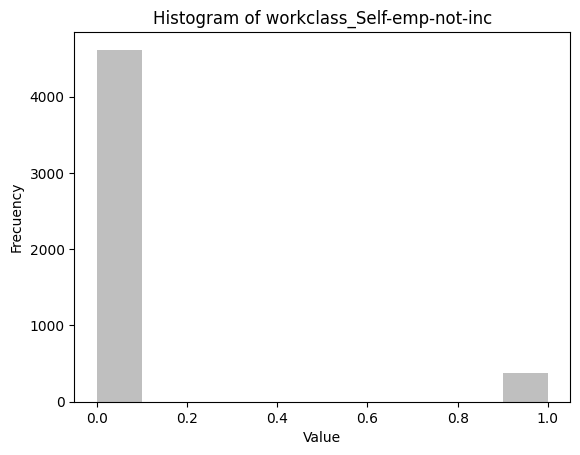

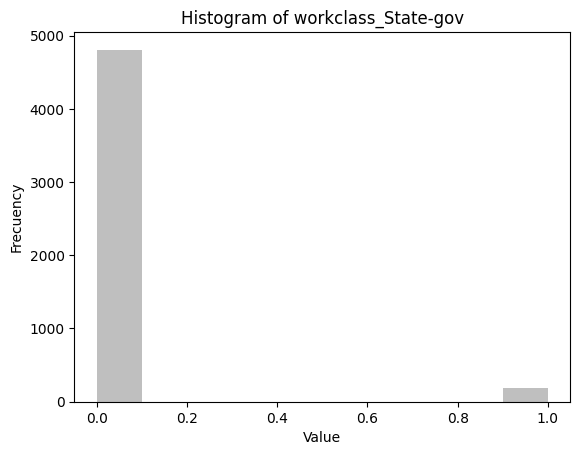

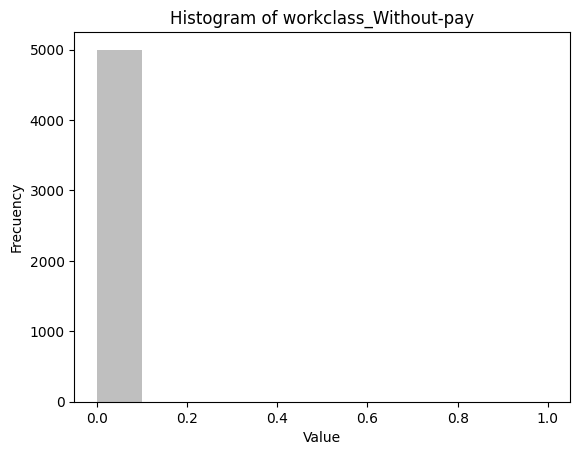

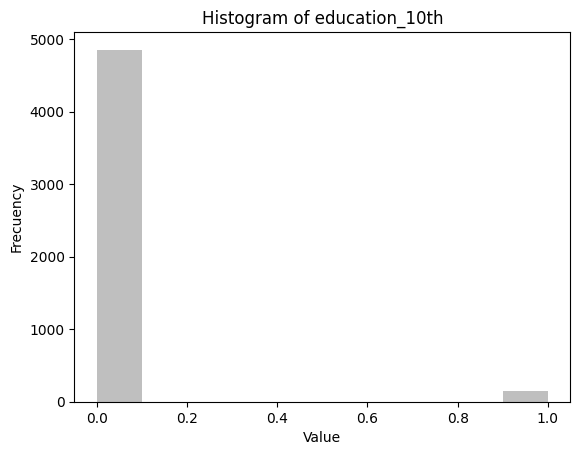

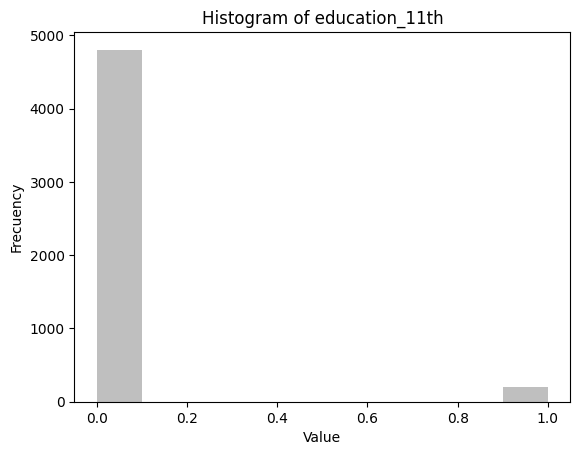

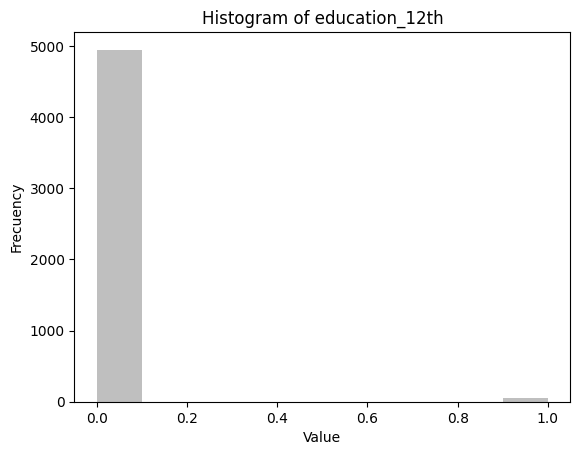

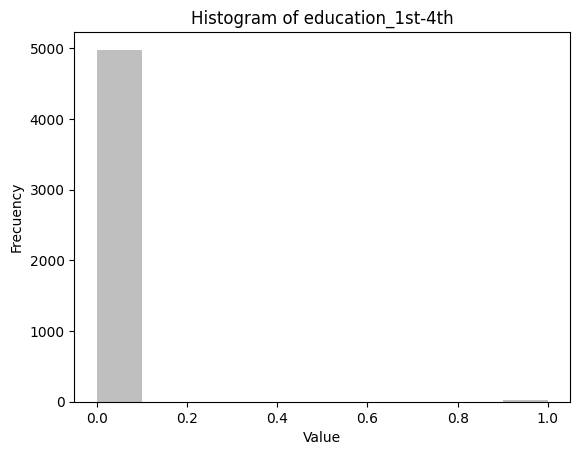

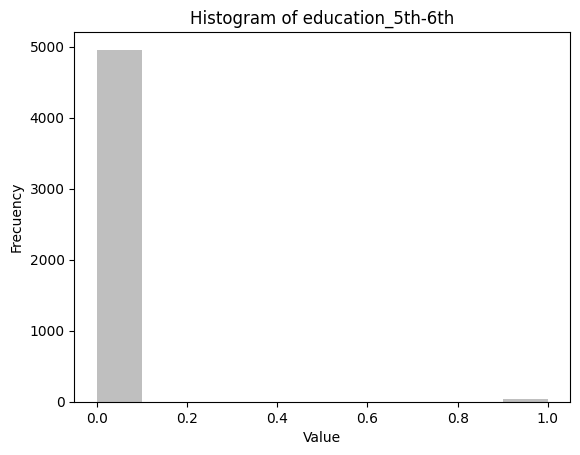

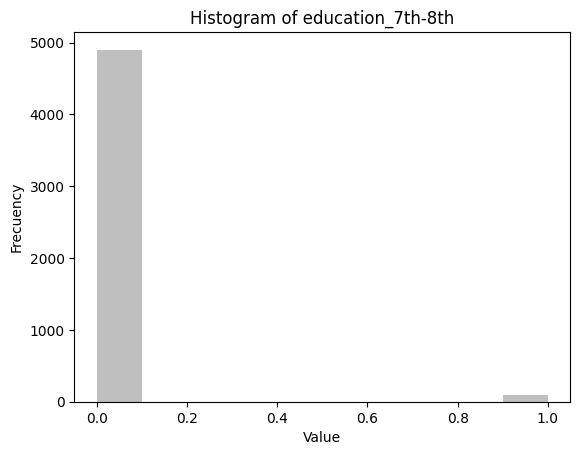

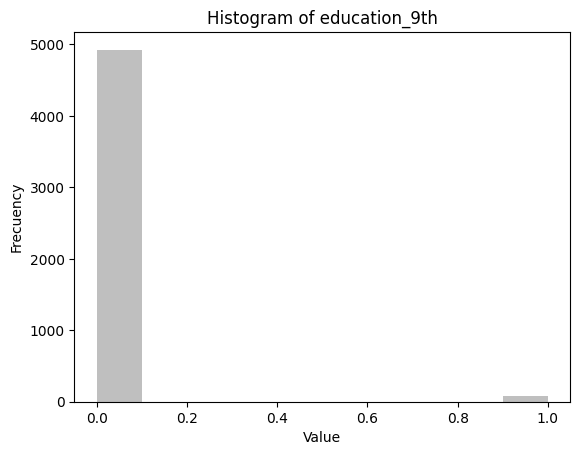

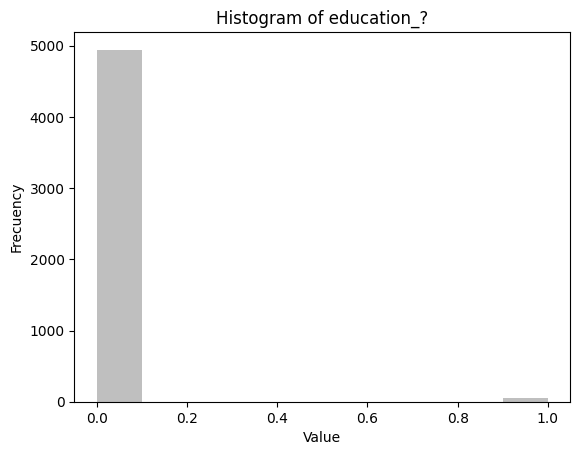

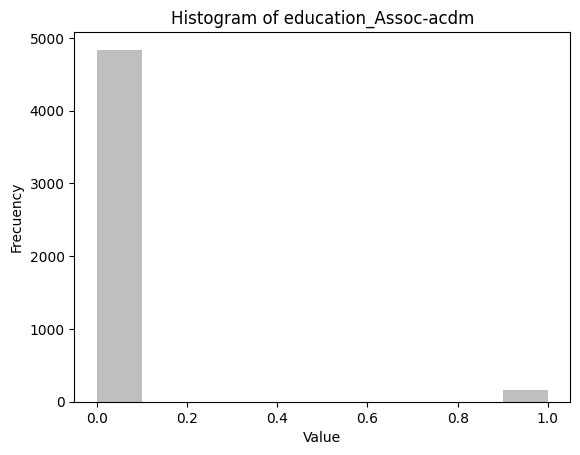

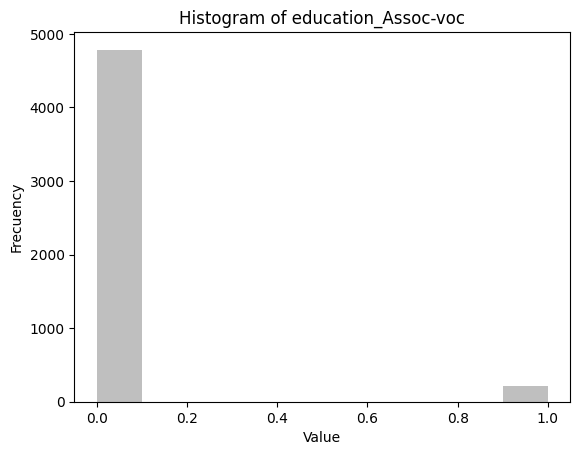

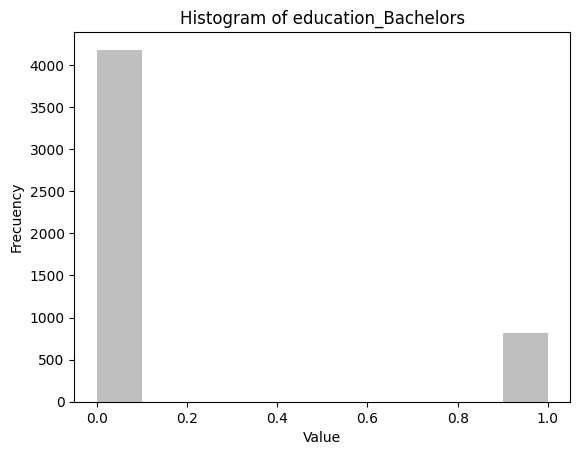

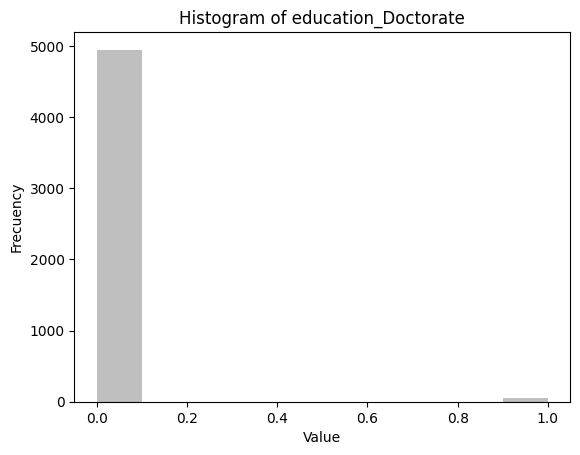

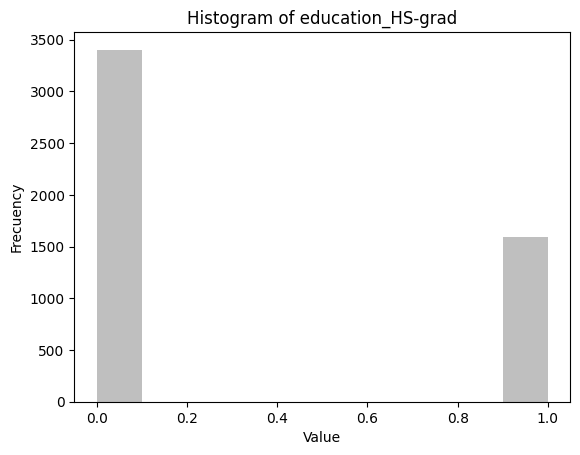

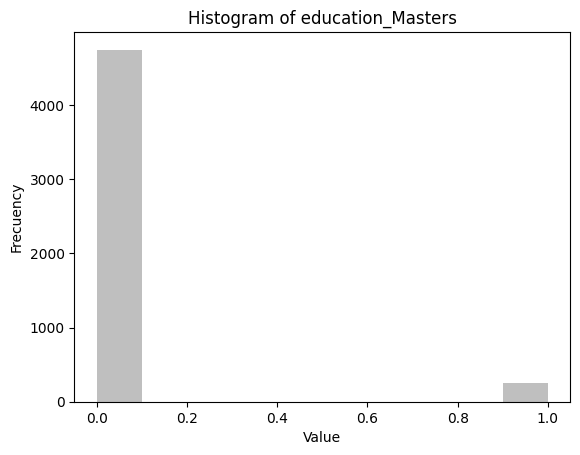

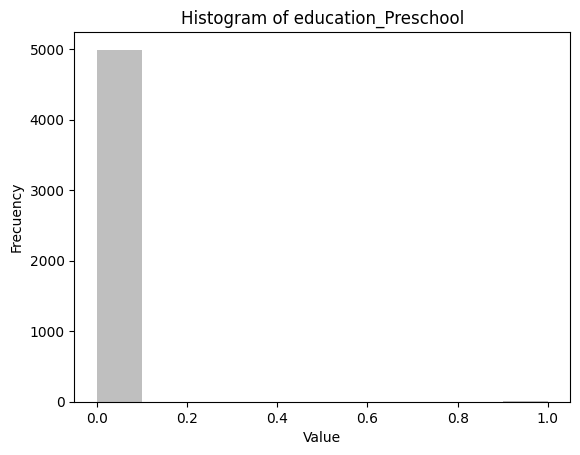

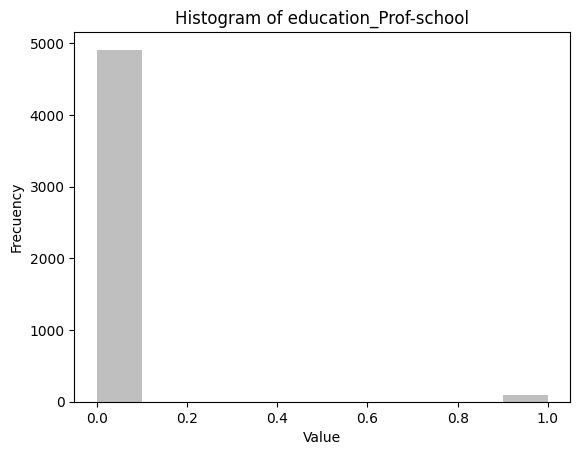

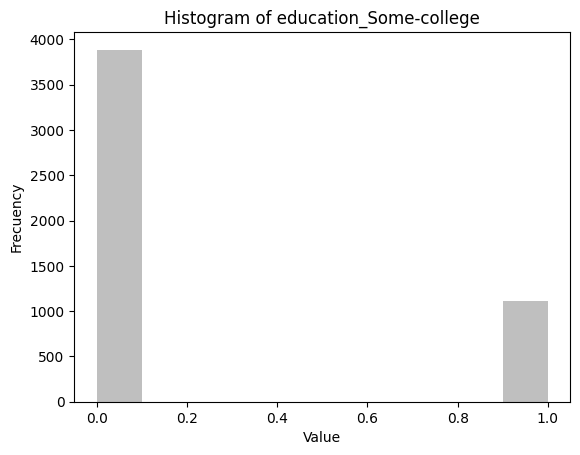

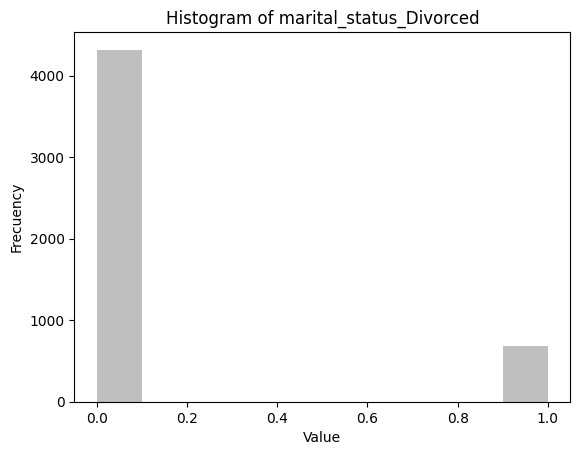

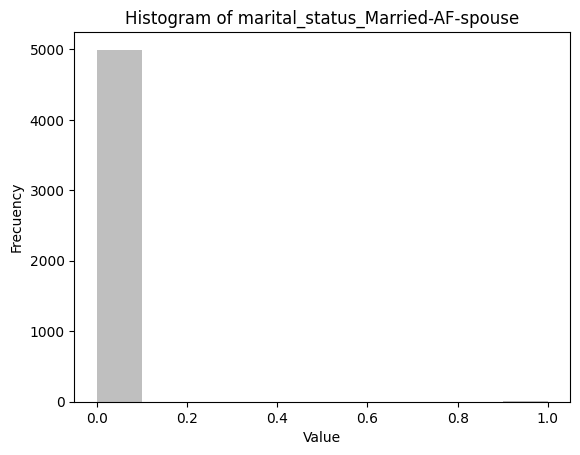

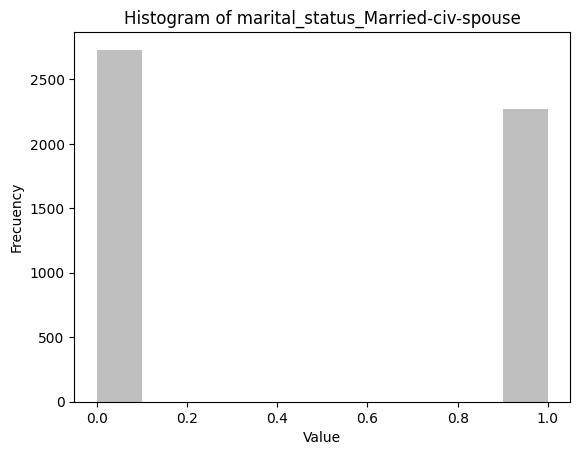

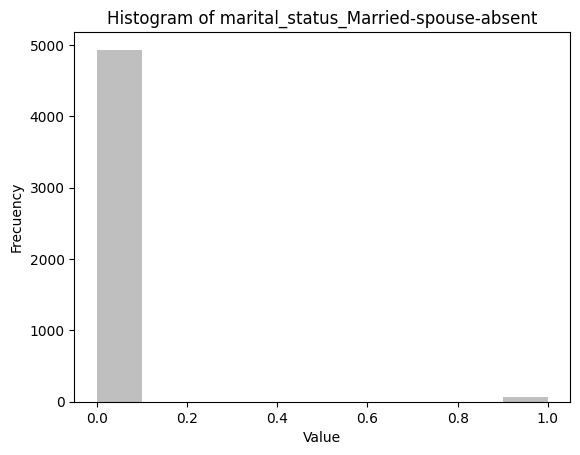

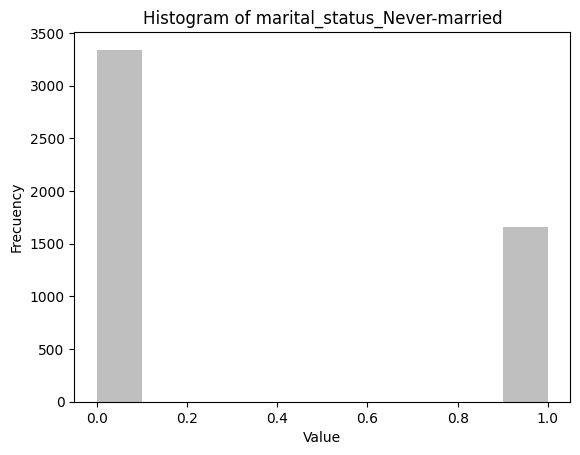

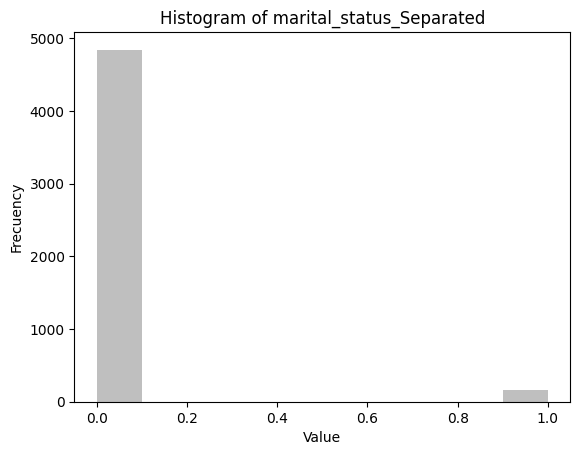

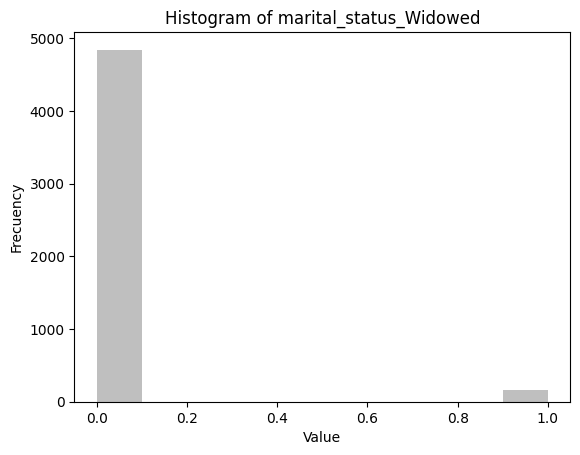

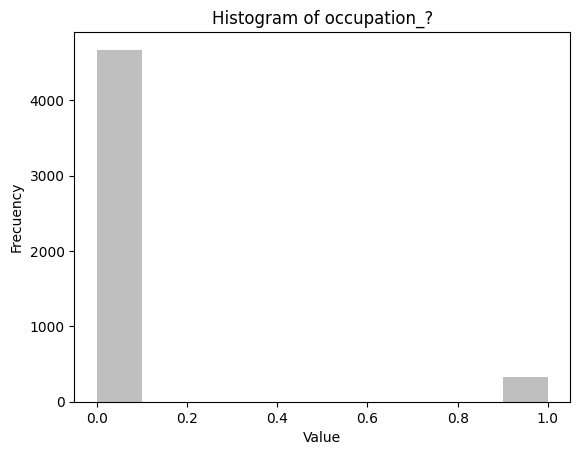

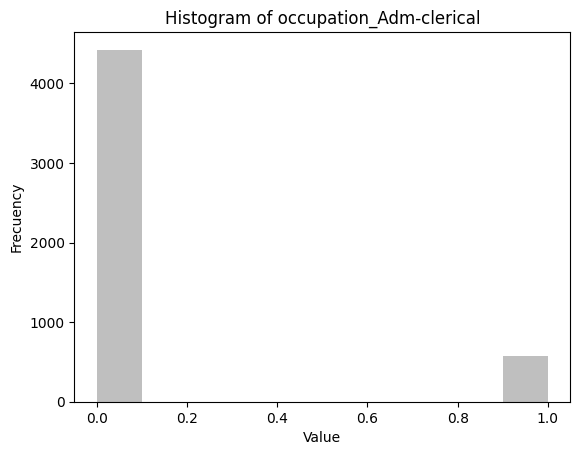

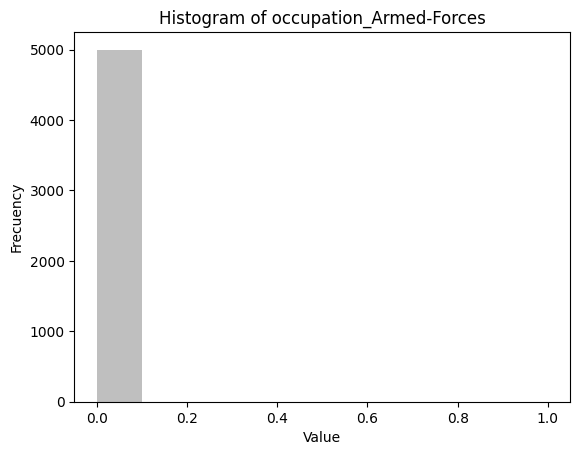

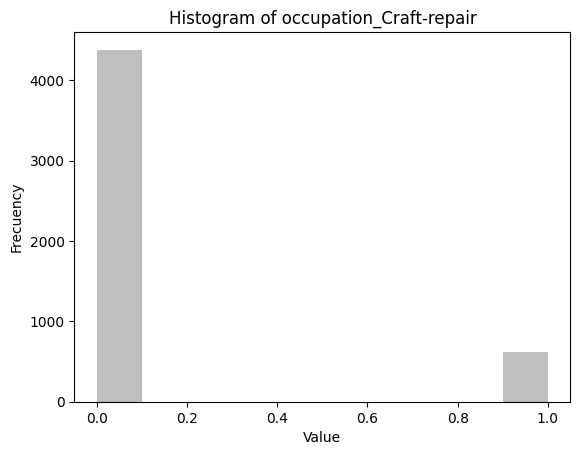

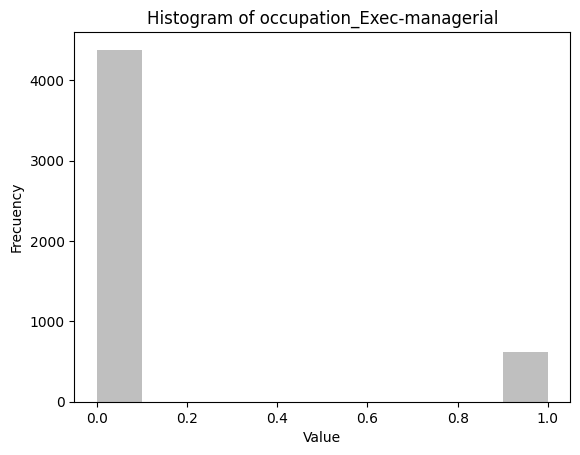

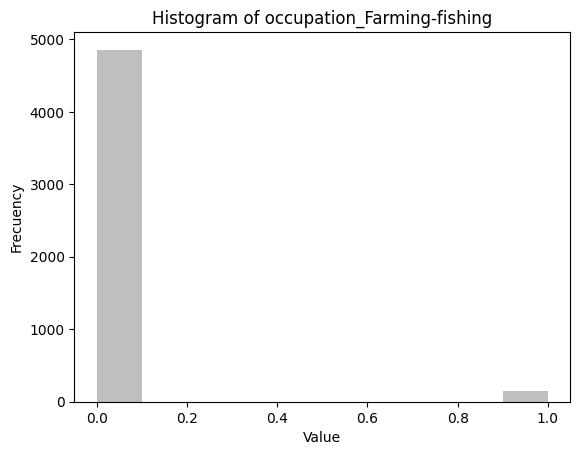

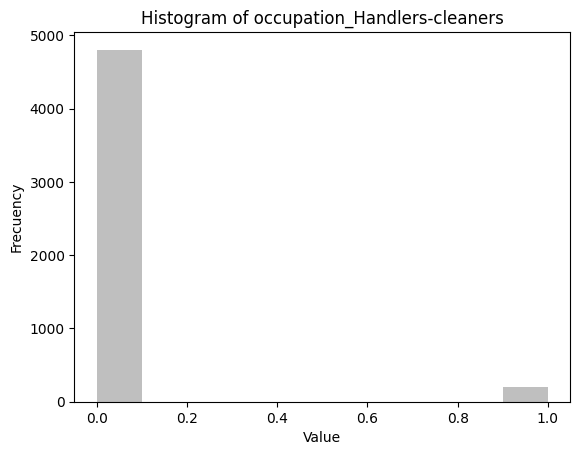

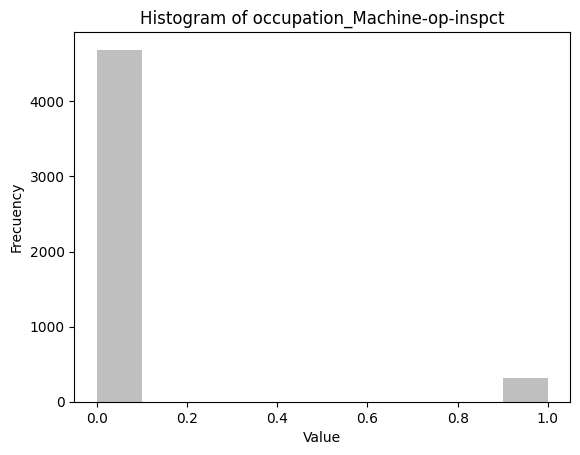

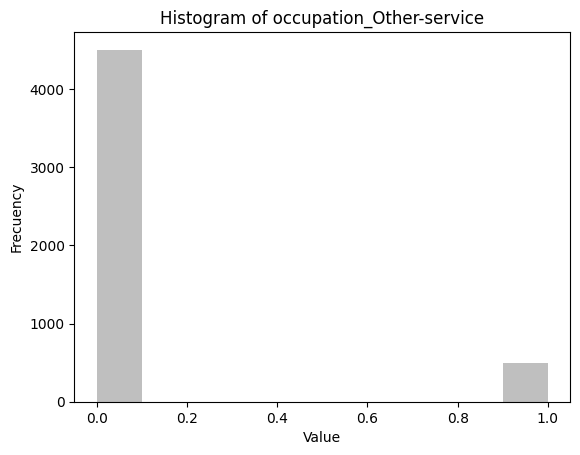

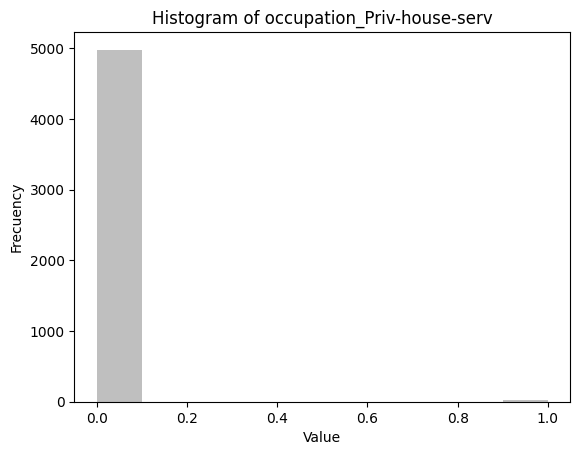

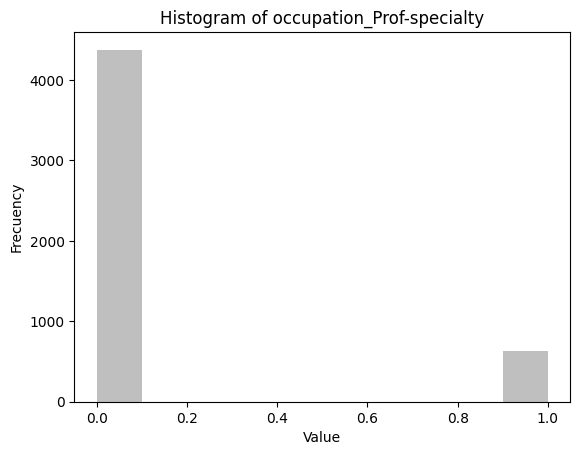

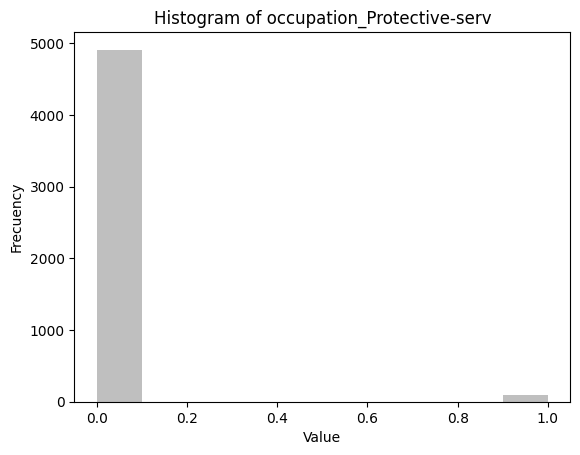

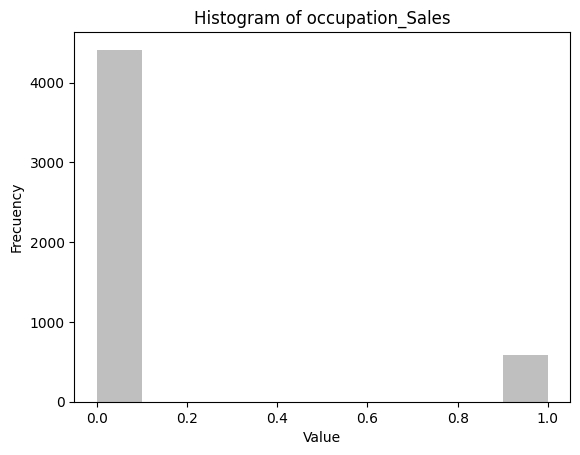

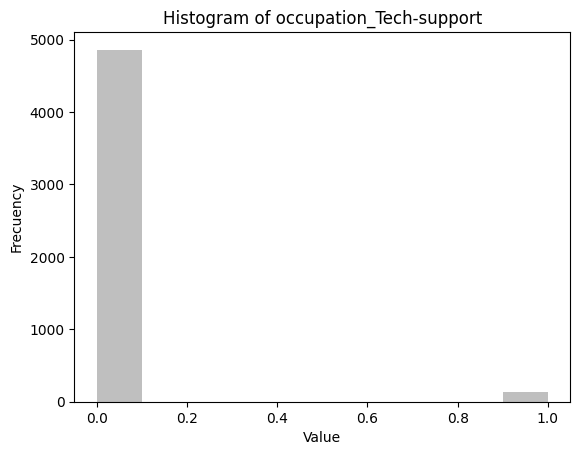

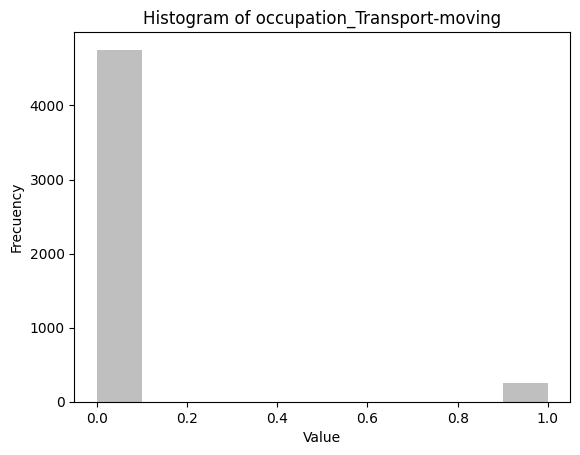

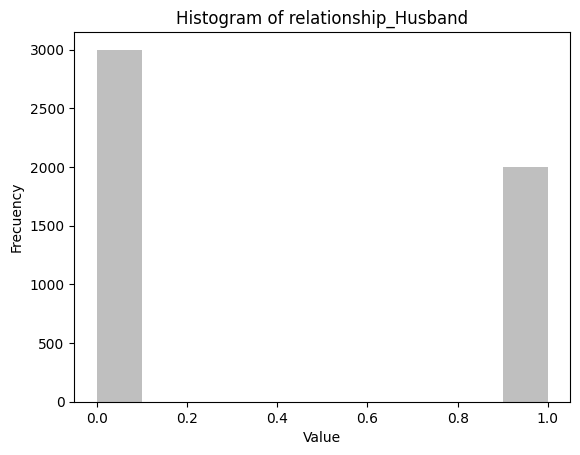

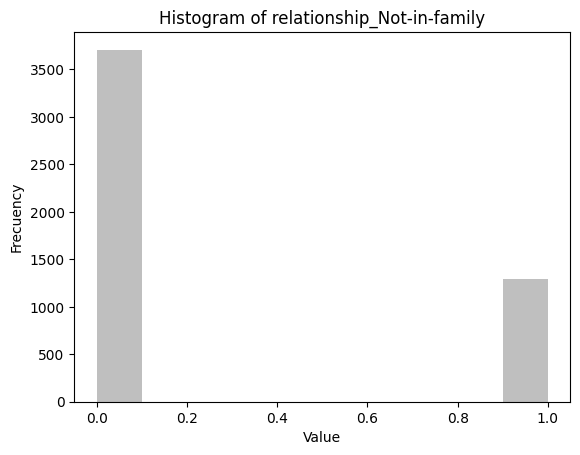

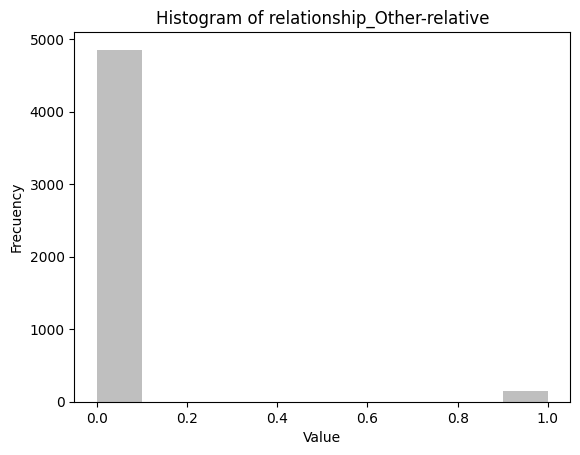

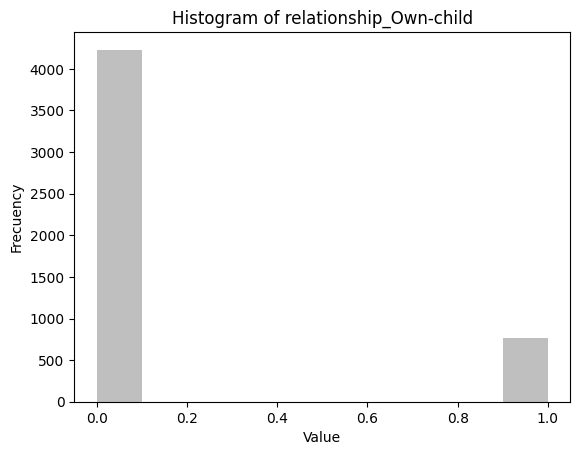

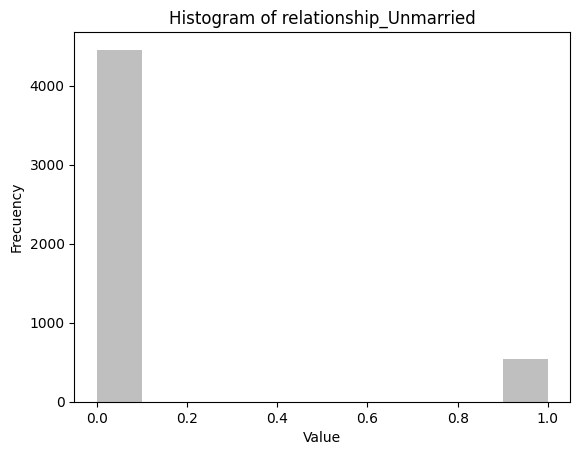

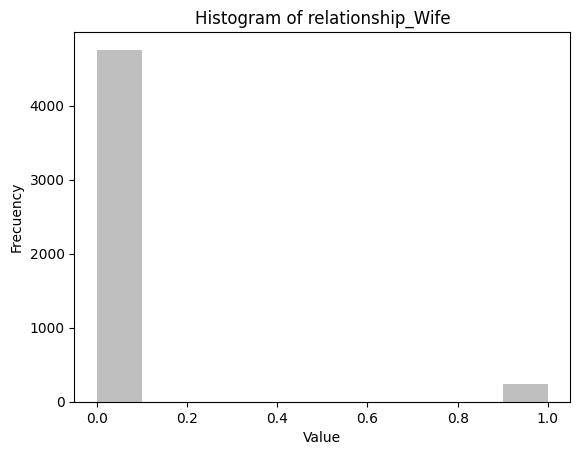

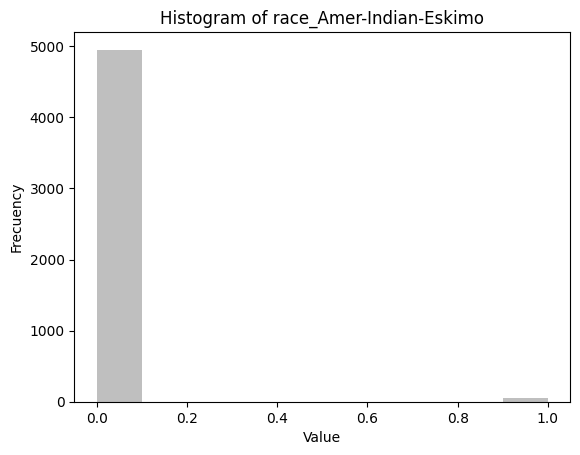

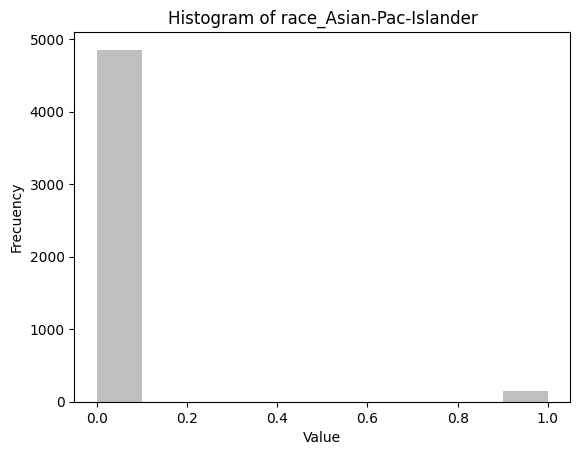

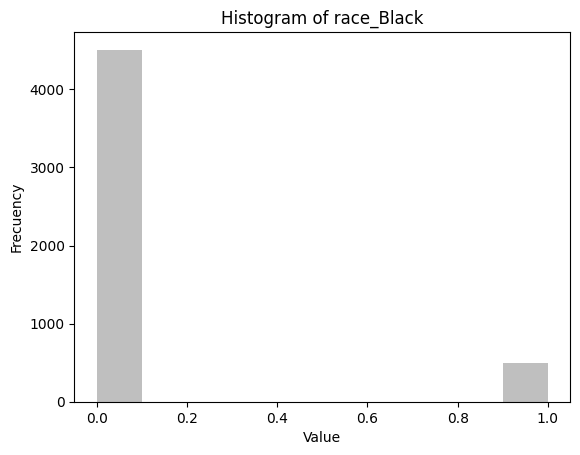

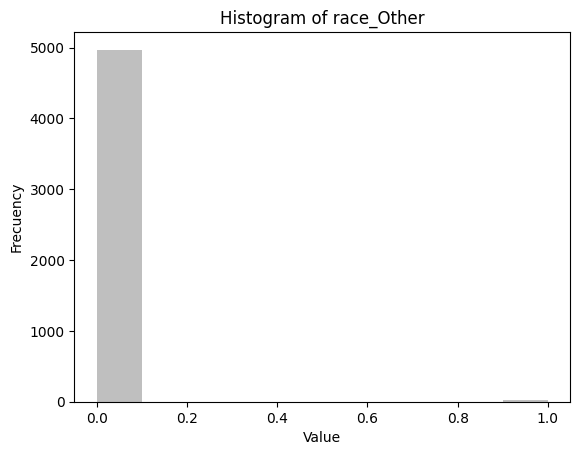

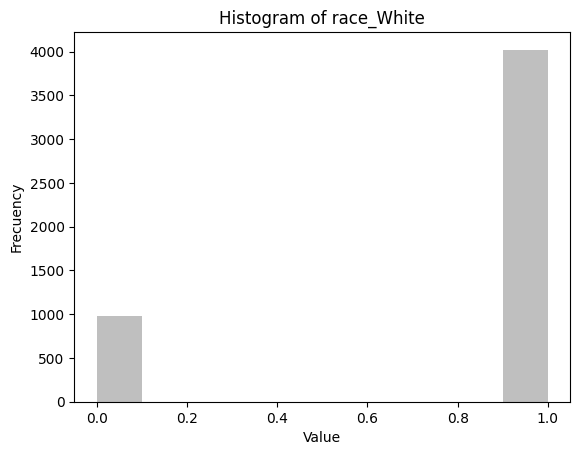

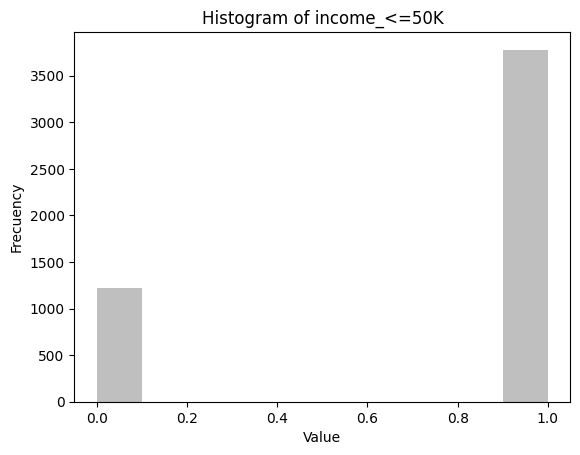

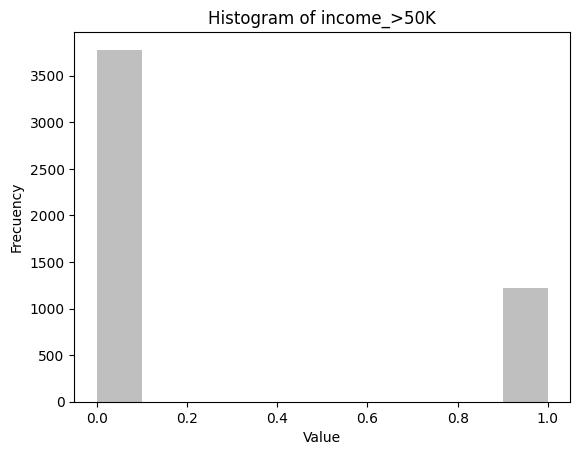

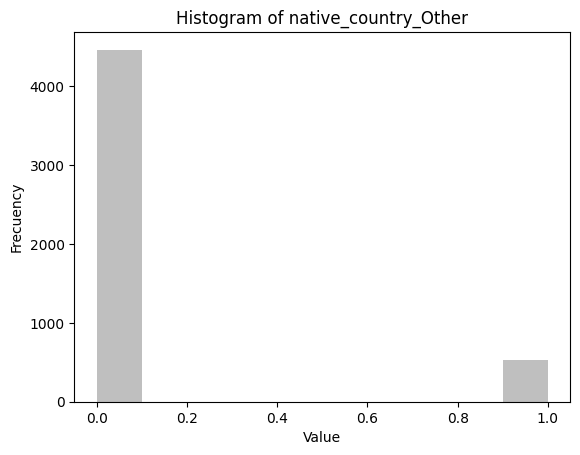

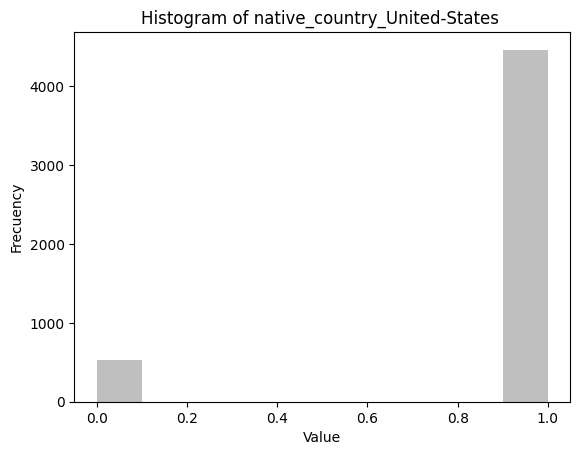

In [ ]:
for col_name in X.columns:
    plot_histogram(X[col_name])


### C. Detección de valores atípicos

- Un valor atípico es una observación que se desvía drásticamente de otras observaciones en un conjunto de datos


- Ocurrencia:
    - Natural, por ejemplo Ingresos de Millonarios
    - Error, por ejemplo peso humano de 5,00 kg. debido al error de escritura adicional 0

- ¿Por qué son problemáticos?
    - Si ocurren naturalmente
        - No necesariamente problemático
        - Pero pueden sesgar su modelo
    - Error
        - Indicativo de problemas de calidad de datos.
        - Tratar de la misma manera como un valor faltante, es decir, usar la imputación
   
   
- ¿Cómo se detectan?
    - Visualizaciones Box Plot



 ### Detección de valores atípicos - Usando Box Plots
- Identifica valores extremos en los datos.
- Los valores atípicos se definen como:
    - Valores inferiores a Q1-1.5 (Q3-Q1) o superiores a Q3 + 1.5 (Q3-Q1)



In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
from IPython.display import Image
Image(filename='outliers_boxplot.jpg')
# Imagine taken from:
# http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/
#No se cuenta con dicha imagen, no se cree que sea necesario incluir en el codigo final

FileNotFoundError: ignored

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[76. 76. 76. 76. 76. 76. 76. 76. 76. 77. 77. 77. 77. 77. 78. 78. 79. 79.
 79. 80. 80. 80. 81. 81. 81. 81. 82. 88. 90. 90. 90. 90. 90. 90. 90.]


In [ ]:
from IPython.display import Image
Image(filename='outliers.jpg')
#No se cuenta con dicha imagen, no se cree que sea necesario incluir en el codigo final

## 3. Creando los Datos para hacer el Modelo

### A. Relaciones entre variables

- La variables independientes pueden estar correlacionadas y en ocasiones hay modelos como las regersiones que no permiten isar variables correlacionadas porque se afecta el resultado.

- Fecha de Nacimiento y Edad tienen una relación entre ellas y hay que decidir cual usar.
- No siempre es evidente esta relación entre las variables




In [ ]:
# Puedes analizar una matriz de correlaciones de todas las variables
X.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,income_<=50K,income_>50K,native_country_Other,native_country_United-States
age,1.000000,-0.080116,0.018769,0.064296,0.056885,0.040538,0.006840,0.049796,0.056642,-0.177769,...,0.032632,-0.013721,-0.029348,-0.001618,-0.033626,0.026744,-0.231230,0.231230,-0.032005,0.032005
fnlwgt,-0.080116,1.000000,-0.058249,-0.000142,-0.004304,-0.006364,-0.003647,0.005205,-0.007592,0.034287,...,-0.024594,-0.072032,-0.054709,0.112766,-0.007250,-0.036127,0.023577,-0.023577,0.080540,-0.080540
education_num,0.018769,-0.058249,1.000000,0.113470,0.096638,0.165958,-0.088811,0.045435,0.068769,-0.097491,...,0.030342,-0.042162,0.074469,-0.082814,-0.054652,0.058536,-0.316027,0.316027,-0.072511,0.072511
capital_gain,0.064296,-0.000142,0.113470,1.000000,-0.033439,0.071881,-0.024709,-0.009880,-0.015945,-0.034812,...,0.027416,-0.007988,0.018937,-0.027529,-0.011197,0.020249,-0.218064,0.218064,0.012697,-0.012697
capital_loss,0.056885,-0.004304,0.096638,-0.033439,1.000000,0.079426,-0.033428,0.011473,0.034958,-0.018600,...,0.032977,-0.022458,0.013884,-0.035910,0.020716,0.021822,-0.159681,0.159681,0.002818,-0.002818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
race_White,0.026744,-0.036127,0.058536,0.020249,0.021822,0.064192,-0.034847,-0.064101,-0.027610,0.007144,...,-0.009407,-0.199529,-0.350239,-0.670279,-0.154794,1.000000,-0.092766,0.092766,-0.134105,0.134105
income_<=50K,-0.231230,0.023577,-0.316027,-0.218064,-0.159681,-0.241162,0.089557,-0.045199,0.006275,0.054039,...,-0.151329,0.036865,-0.021059,0.088057,0.037285,-0.092766,1.000000,-1.000000,0.017541,-0.017541
income_>50K,0.231230,-0.023577,0.316027,0.218064,0.159681,0.241162,-0.089557,0.045199,-0.006275,-0.054039,...,0.151329,-0.036865,0.021059,-0.088057,-0.037285,0.092766,-1.000000,1.000000,-0.017541,0.017541
native_country_Other,-0.032005,0.080540,-0.072511,0.012697,0.002818,0.011881,-0.016699,-0.010076,-0.039674,0.042493,...,0.017339,-0.007538,0.337316,-0.016822,0.084327,-0.134105,0.017541,-0.017541,1.000000,-1.000000


### B. Selección de Variables


In [ ]:
# Al agregar variable dummies por variables categóricas se incrementó el número de variables
print(df.shape)
print(X.shape)

(5000, 15)
(5000, 68)


In [ ]:
# Usar train_test_split in sklearn.cross_validation para partir los datos en dos set de enternamiento y de testeo
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=1)


In [ ]:

# Usar el  método feature selection para seleccionar las varuables más significativas
import sklearn.feature_selection


select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, Y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]


In [ ]:
print(colnames_selected)

['hours_per_week', 'workclass_Self-emp-not-inc', 'marital_status_Divorced', 'marital_status_Married-civ-spouse', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Farming-fishing', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Unmarried', 'relationship_Wife', 'race_Black', 'income_<=50K', 'income_>50K']


In [ ]:
print(len(colnames_selected))

20


In [ ]:
import numpy as np #Biblioteca para crear arreglos.
import matplotlib.pyplot as plt #Biblioteca para plotear.
import cv2 #Biblioteca para análisis de imágenes.
import pandas as pd #Biblioteca para importar datos.
from astropy.io import fits #Biblioteca para adquirir datos desde archivos fits.
from google.colab import drive #Biblioteca para importar datos desde google drive.
from astropy.visualization import make_lupton_rgb #Biblioteca para convertir imágenes a RGB desde archivos fits.
from google.colab.patches import cv2_imshow #Biblioteca con parche para mostrar imágenes desde cv2.
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops #Biblioteca para extracción de características desde los niveles de gris en una matriz de co-ocurrencia.
from sklearn import preprocessing #Biblioteca para normalizar datos.
from sklearn.model_selection import train_test_split #Biblioteca para divir los datos de entrenamiento.
from keras.models import Sequential #Biblioteca para crear modelos secuenciales.
from keras.layers import Dense #Biblioteca para crear las capas de las redes neuronales (Una capa consta de una función de cálculo de tensor de entrada y tensor de salida).
from tensorflow import keras #Biblioteca para crear optimizadores.
from sklearn.metrics import roc_curve #Biblioteca para determinar datos de la curva característica operativa del receptor (ROC).
from sklearn.metrics import roc_auc_score #Biblioteca para determinar puntuaje de la clasificación de los datos.


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3500, 68) (750, 68) (750, 68) (3500,) (750,) (750,)


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(68,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)#default is 0.001, puede ser 0.01 o 0.1
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=1000, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 0.6507 - accuracy: 0.6651 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6269 - accuracy: 0.6657 - val_loss: 0.6186 - val_accuracy: 0.6693
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6080 - accuracy: 0.6654 - val_loss: 0.6038 - val_accuracy: 0.6680
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5922 - accuracy: 0.6671 - val_loss: 0.5905 - val_accuracy: 0.6680
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5773 - accuracy: 0.6689 - val_loss: 0.5775 - val_accuracy: 0.6693
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5625 - accuracy: 0.6743 - val_loss: 0.5638 - val_accuracy: 0.6680
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5468 - accuracy: 0.6823 - val_loss: 0.5494 - val_accuracy: 0.6747
Epoch 8/100
4/4 [===

#Actividad Titanic

In [ ]:
%%capture
!pip install rpy2==3.5.1

In [ ]:
%load_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
%%R
library(readr)
library(magrittr)
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [ ]:
%%R
data <- read.csv("drive/MyDrive/titanic.csv")

In [ ]:
%%R
colnames(data)

 [1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"   


In [ ]:
%%R
data%>%
head(n=2)

  PassengerId Survived Pclass
1           1        0      3
2           2        1      1
                                                 Name    Sex Age SibSp Parch
1                             Braund, Mr. Owen Harris   male  22     1     0
2 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female  38     1     0
     Ticket    Fare Cabin Embarked
1 A/5 21171  7.2500              S
2  PC 17599 71.2833   C85        C


In [ ]:
%%R
data <- data %>% replace(is.na(.), 0)

1. Los hombres que sobrevivieron ¿A qué clase pertenecían?

In [ ]:
%%R
data%>%
filter(Sex == "male", Survived==1)%>%
group_by(Pclass)%>%
summarize(col=n())%>%
arrange(col)

# A tibble: 3 × 2
  Pclass   col
   <int> <int>
1      2    17
2      1    45
3      3    47


2. ¿Cuál es el rango de edades de hombres y mujeres que sobrevivieron?

In [ ]:
%%R
data%>%
filter(Survived == 1, Age>=18)%>%
group_by(Age)%>%
summarize(cantidad=n())%>%
head(n=1)

# A tibble: 1 × 2
    Age cantidad
  <dbl>    <int>
1    18        9


In [ ]:
%%R
data%>%
filter(Survived == 1, Age>=18)%>%
group_by(Age)%>%
summarize(cantidad=n())%>%
tail(n=1)

# A tibble: 1 × 2
    Age cantidad
  <dbl>    <int>
1    80        1


3. Porcentaje de niños que sobrevivieron.

In [ ]:
%%R
data%>%
filter(Age<18, Age>0)%>%
summarize(cantidadTotal=n())

  cantidadTotal
1           113


In [ ]:
%%R
data%>%
filter(Survived==1, Age<18, Age>0) %>%
summarize(cantidad=n())

  cantidad
1       61


In [ ]:
61/113*100

53.98230088495575

4. ¿Cuántos hombres con hijos sobrevivieron?

In [ ]:
%%R
data%>%
filter(Survived==1, Sex=="male", Parch==1)%>%
summarize(col=n())

  col
1  19


5. ¿Cuántas personas sobrevivieron por clase?

In [ ]:
%%R
data%>%
filter(Survived==1)%>%
group_by(Pclass)%>%
summarize(col=n())%>%
arrange(col)

# A tibble: 3 × 2
  Pclass   col
   <int> <int>
1      2    87
2      3   119
3      1   136


#Avance de evidencia 1

In [ ]:
print ("Hello, World");

Hello, World


## 2.Lleva a cabo una investigacion sobre la empresa Instacart en internet

**¿Cómo nace Instacart?**
Corrían la primera década del milenio cuando Apporva Mehta, ingeniero licenciado en la Universidad de Waterloo y empleado en la cadena de suministro de Amazon, se debatían entre seguir en una de las compañías más celebradas del mundo, o lanzarse a crear su propia empresa.Finalmente, la pasión por resolver problemas pudo más y se lanzó a emprender… Sin embargo, acertar con el proyecto no es fácil, ni siquiera en Silicon Valley. Lo intentó con un sistema de alertas para compañías de juego, con una red social para abogados, hasta con un “Grupon” de comida… Hasta 20 veces probó Mehta antes de, en 2012, dar con la tecla adecuada para poner en marcha una de las empresas y de los modelos de negocio más imitados en todo el mundo: Instacart. Una compañía de e-grocery basada en la idea de la conveniencia, la rapidez y la confianza a través de la figura del personal shopper. Probablemente su experiencia desarrollando sistemas de fulfillment para mover los paquetes desde los almacenes de Amazon hasta los hogares resultó muy valiosa para su nuevo experimento.

Instacart nace como una compañía de e-grocery basada en la idea de la conveniencia, la rapidez y la confianza a través de la figura del personal shopper.

En apenas tres años, en 2015, se consideraba una de las compañías más prometedoras de EEUU, contaba con 200 empleados y había logrado una valoración de más de $2.000 millones.

**Amazon se cruza en el camino**
En 2017 tuvo que cruzarse en el exitoso camino de Mehta su antiguo jefe. Jeff Bezos, en una operación que sorprendió a propios y extraños, se hacía, por $13.700 millones, con Whole Foods la cadena de supermercados orgánicos de referencia en EEUU, y principal partner de Instacart desde 2014. Entonces, los analistas auguraban un futuro complicado a la startup. No solo perdía una de sus principales fuentes de ingresos, sino que lo hacía a manos del principal disruptor del retail y del comercio electrónico a nivel global.

Hoy, sin embargo, Instacart acumula el 45% del mercado de “grocery delivery”, según Bloomberg, solo superado por Walmart. La app está disponible para el 85% de los hogares estadounidenses y el 80% de Canadá. Cuenta con más de 600 retailers asociados, entre ellos, Walmart, Publix, CostCo, Sephora o Walgreens, con 55.000 tiendas en 5.500 ciudades. Su valoración se ha disparado hasta los 39.000 millones de dólares, tras su última ronda de $265 millones en marzo de 2021.

**El resurgir de Instacart**
¿Qué ha pasado en estos últimos 4 años para que la compañía pase de temer por su continuidad a multiplicar por 15 su valoración?

Un factor reciente y evidente ha sido la pandemia y los sucesivos confinamientos que han disparado el comercio electrónico de alimentación en todo el mundo. Apenas comenzada la crisis en EEUU, en junio de 2020, la compañía había multiplicado por cinco su número de pedidos. Pero no se trata solo de un incremento de la demanda, sino de cómo la compañía supo responder a ese crecimiento inesperado y sostenido “comprimiendo un planning de tres años en tan solo 30 días”, como explicaba su director técnico, Mark Schaaf. Esto supuso desde actualizar sus canales digitales, a incorporar hasta 300.000 nuevos compradores y 35 nuevas marcas de retailers, hasta incorporar soluciones de AI para predecir la demanda, y con ello mejorar el aprovisionamiento.  

**Modelo de Negocio de Instacart**

Una propuesta de valor basada en la conveniencia y la rapidez (entregas en una hora, cuando el estándar estaba en un día), facilidad (una app móvil muy sencilla e intuitiva) y la confianza (basada en la figura de un personal shopper que hace la compra “como si fuera el propio usuario”, al que además puedes calificar y consultar sus calificaciones; y en la posibilidad de comprar en su “tienda de confianza”. Su segmento de cliente inicial, personas que quieren la compra en casa, que no les gusta o no tienen tiempo para comprar, y que están dispuestos a pagar “un poco más” por ese servicio de conveniencia.

Instacart une el modelos de negocio de plataforma (conecta usuarios con unos shoppers) con un market place de retailers


Para lograr cumplir esta propuesta de valor, Mehta decide optar por un formato que une los modelos de negocio de plataforma (conecta usuarios con unos shoppers) con un market place de retailers.

De esta manera, traslada dos recursos clave -los propios supermercados y las personas que realizan la compra, y que teóricamente son la base de esa confianza- y una actividad clave – el acto en sí mismo de comprar- fuera de su organización. Es decir, en términos del Busines Model Canvas de Osterwalder, los trasladó de los segmentos de la parte operativa de la empresa, a al segmento de los clientes. Utilizando para ello dos de los atributos de las Organizaciones Exponenciales que define el modelo ExO, creado por Salim Ismail[3]: Recursos Apalancados y Staff on Demand o plantilla bajo demanda, y que comparten algunas dos de las startups más disruptivas de la última década como AirbnB y Uber.

Esta decisión tiene consecuencias inmediatas en el resto de segmentos del modelo de negocio. En primer lugar, en la estructura de costes, no debe soportar todo el peso del medio millón de shoppers con los que cuenta la compañía (junio 2021) sino solo aquellos que -con el tiempo- ha decidido incorporar a la plantilla para asumir las labores de picking (preparado de pedidos), el resto, los encargados de esa última milla, son personal externo. Tampoco establecimientos, almacenes, ni siquiera transporte, ya que el vehículo lo aporta el propio shopper. Sus gastos se orientan principalmente a la tecnología, los empleados fijos y a la comisión de los shoppers (variable).

En segundo lugar, sus fuentes de ingresos se van incrementando y diversificando. El modelo comienza inicialmente con el mark-up que aplica sobre los productos y la tarifa del servicio de entrega.  Después, incorporá la tarifa de suscripción anual, Instacart Express, “El Dorado” de cualquier servicio online que le acerca a la deseada fidelidad y recurrencia. Posteriormente ha incorporado otras líneas de negocio como publicidad, servicios de marketing, Tarjeta de Crédito (con JP Morgan Chase) o tarifas por el posicionamiento de productos en el Marketplace.

**Puntos clave del modelo de negocio de Instacart: partners**

¿Dónde están entonces sus activos clave?. En dos áreas: la tecnología y los partners.

Antes de 2017 Instacart había logrado cerrar una respetable red de retailers colaboradores. Entre ellos, Safeway o Costco. Pero el acuerdo con Whole Foods representaba una porción clave de su actividad, hasta el punto de que se habían convertido en el servicio de e-commerce de este retailer especializado en comida orgánica y que sirve a un segmento de público -medio alto, alto- muy afín al tipo de servicio de Instacart. Por ello, la operación de compra por parte de Amazon era un golpe importante en su línea de flotación. ¿Cuál fue la forma de defenderse de Instacart? Apostar por la diversidad y variedad de partners y la cobertura. Tan solo un año después, había sumado tanto grandes firmas como Kroger (1.600 de sus más de 2.800 locales en EEUU), Aldi, Walmart, CVS, Petco; como pequeños y medianos retailers locales. En total, más de 300 partners en más de 4.000 ciudades que más que nunca percibían a la startup como un aliado frente a la amenaza de Amazon.

**Puntos clave del modelo de negocio de Instacart: tecnología**

El otro pilar clave de Instacart ha sido la tecnología. En términos de ExO, sería la apuesta decidida por los atributos de Algoritmos, Interfaces y Dashboards o cuadros de mandos. He aquí algunos ejemplos:

Una app intuitiva, fácil de utilizar para que el proceso de compra sea rápido y sencillo.
Multicanalidad en la atención al cliente a través de chat, email, y teléfono
Un sistema para ofrecer publicidad segmentada de sus partners y que devuelve información en tiempo real de la efectividad de sus campañas.
Un sistema de análisis de oferta y demanda del mercado que les permite reducir el coste de los productos mediante un sistema de precios dinámicos.
Un sistema de integrado de gestión de la cadena de suministro y del inventario en tiempo real.
Herramientas de análisis de datos para predecir el comportamiento de los usuarios, y apoyar las funciones de procesado, pago y entrega.
Sistema logístico y de optimización de rutas ultra-eficiente.
Esta apuesta por la tecnología, y su formato flexible, le permitió responder de una forma eficiente ante los estragos de la pandemia y multiplicar por cinco el número de pedidos. Instacart tomó medidas como: actualización de todos los canales digitales, incluida la app (que aumentó sus descargas diarias un 2018% cuando comenzó el confinamiento), la web y su software; la firma y consiguiente integración de 35 nuevas marcas con sus 2.500 locales. Ante los graves problemas de abastecimiento y comportamiento inhabitual de los consumidores, y los desfases entre la demanda y los artículos disponibles, la compañía trabajó específicamente en soluciones para gestionar de forma más eficiente el stock. Por ejemplo, aceleró el flujo de información entre los nodos participantes e implementó una solución de Inteligencia Artificial para analizar las búsquedas de los usuarios en las aplicaciones. Gracias a estas medidas, la compañía aumentó el ticket medio un 35% y se mejoró el aprovisionamiento en los establecimientos.

Como compañía cuyo modelo de negocio está basado en la denominada Gig Economy, no ha estado exenta de polémicas.  Desde conflictos con los empleados que decidían sindicarse para defender sus condiciones laborales, hasta quejas por la falta de medios de seguridad para los shoppers durante la pandemia.


[1] Bloomberg, citado en artículo: https://www.eleconomista.com.mx/empresas/Como-es-Instacart-la-app-que-inspiro-a-Cornershop-20210627-0020.html

[2] https://www.diegocoquillat.com/instacart-la-tienda-de-alimentacion-a-domicilio-multiplico-por-cinco-su-negocio-durante-la-crisis-del-coronavirus/

[3] Organizaciones Exponenciales. Salim Ismail.

[4] Romanos, B. (2022). Instacart: modelo de negocio. Techfoodmag. https://www.techfoodmag.com/instacart-modelo-de-negocio/#Como_nace_Instacart

## 3. La información que será analizada corresponde a los pedidos de los clientes a través del tiempo. Para ello se cuenta con un dataset anónimo de alrededor de 3 millones de pedidos de aproximadamente 200,000 usuarios de la empresa.

## 4. Una vez que se tengan los datos, realiza lo siguiente:

## Elabora un diccionario de datos

In [ ]:
import csv

with open('/content/drive/MyDrive/instacart/combinado_csv.csv', mode='r') as inp:
  reader = csv.reader(inp)
  dict_from_csv = {rows[0]:rows[1] for rows in reader}

print(dict_from_csv)


{'\ufeffaisle_id': 'aisle', '1.0': '', '2.0': '', '3.0': '', '4.0': '', '5.0': '', '6.0': '', '7.0': '', '8.0': '', '9.0': '', '10.0': '', '11.0': '', '12.0': '', '13.0': '', '14.0': '', '15.0': '', '16.0': '', '17.0': '', '18.0': '', '19.0': '', '20.0': '', '21.0': '', '22.0': '', '23.0': '', '24.0': '', '25.0': '', '26.0': '', '27.0': '', '28.0': '', '29.0': '', '30.0': '', '31.0': '', '32.0': '', '33.0': '', '34.0': '', '35.0': '', '36.0': '', '37.0': '', '38.0': '', '39.0': '', '40.0': '', '41.0': '', '42.0': '', '43.0': '', '44.0': '', '45.0': '', '46.0': '', '47.0': '', '48.0': '', '49.0': '', '50.0': '', '51.0': '', '52.0': '', '53.0': '', '54.0': '', '55.0': '', '56.0': '', '57.0': '', '58.0': '', '59.0': '', '60.0': '', '61.0': '', '62.0': '', '63.0': '', '64.0': '', '65.0': '', '66.0': '', '67.0': '', '68.0': '', '69.0': '', '70.0': '', '71.0': '', '72.0': '', '73.0': '', '74.0': '', '75.0': '', '76.0': '', '77.0': '', '78.0': '', '79.0': '', '80.0': '', '81.0': '', '82.0': '

## Elabora un diagrama de datos


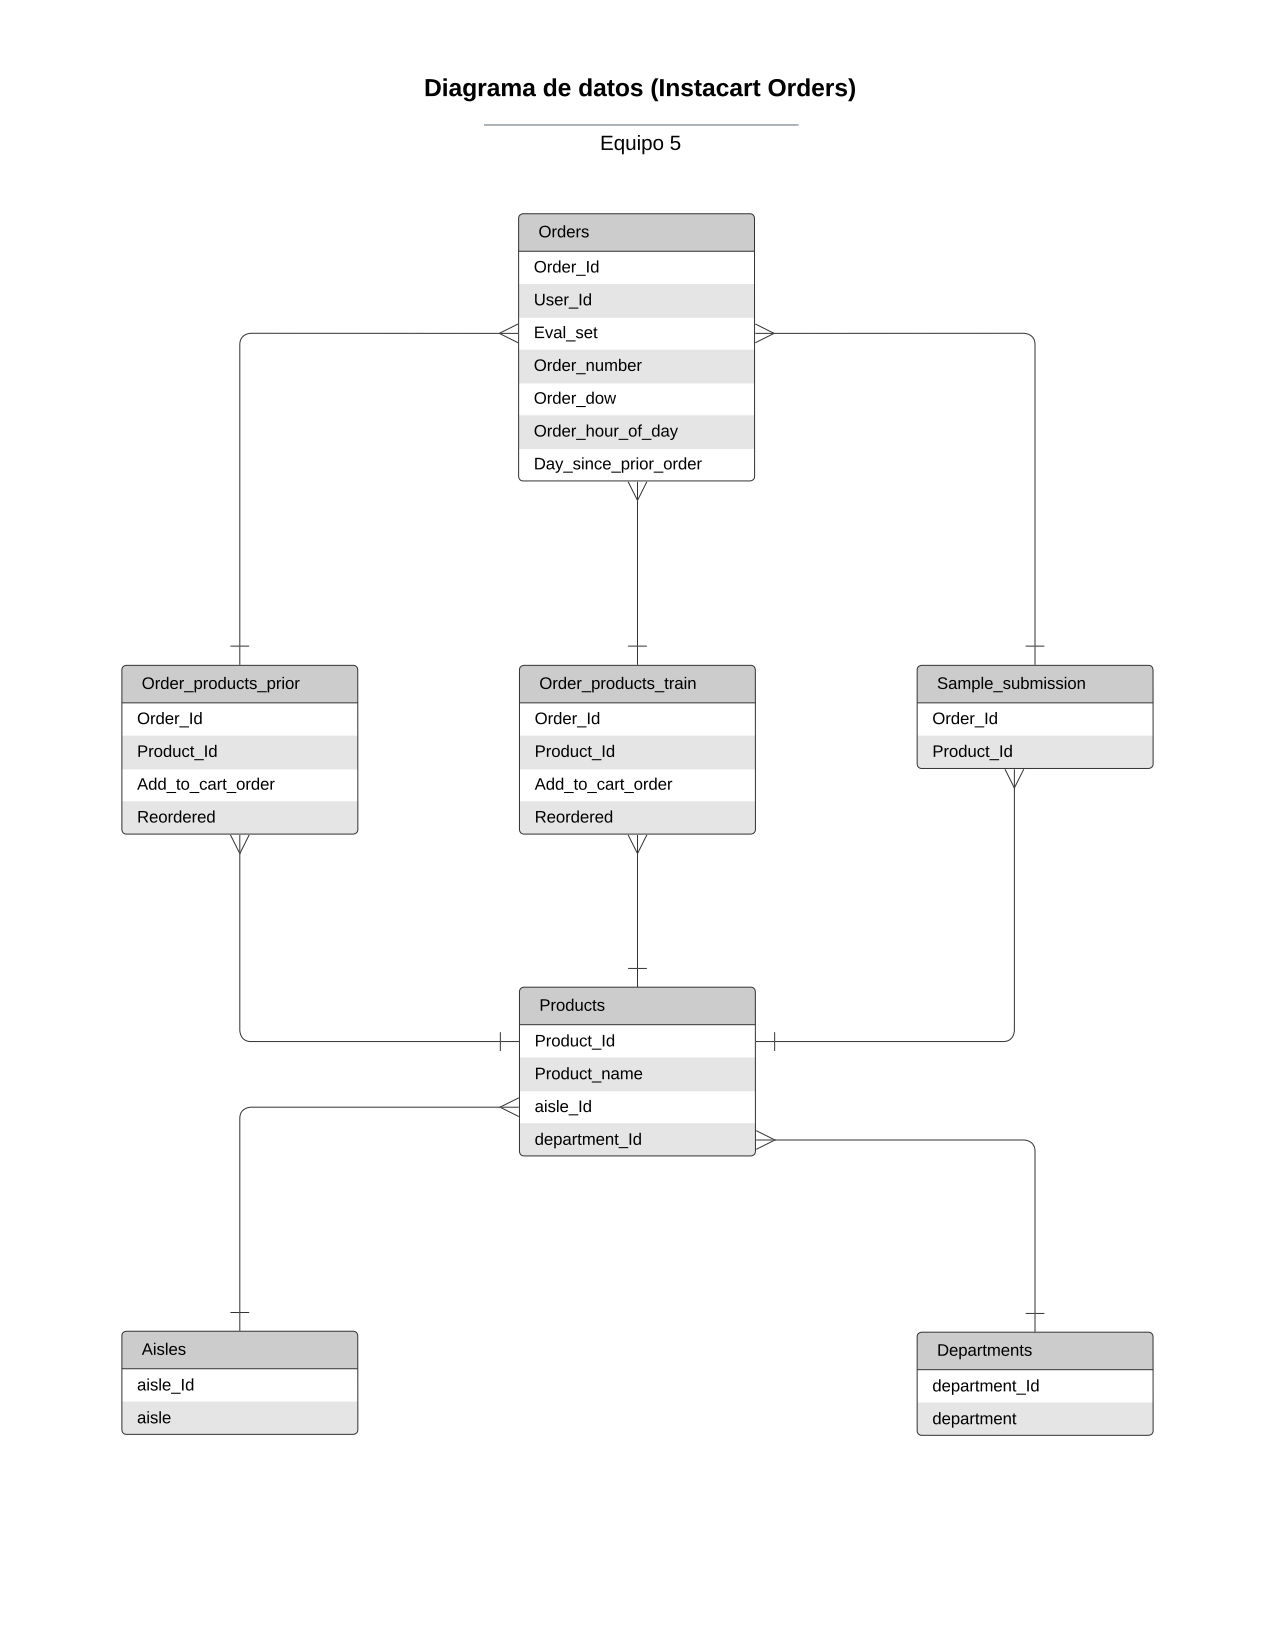

##Analisis Descriptivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/instacart")

In [ ]:
extension = 'csv'
todos_los_archivos = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combina todos los archivos de la lista
combinado_csv = pd.concat([pd.read_csv(f) for f in todos_los_archivos ])
#exporta a csv
combinado_csv.to_csv( "combinado_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
pd.read_csv('aisles.csv')

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


En el csv de "aisles", nos dice la id por la que se identifican los pasillos, ademas de los nombres con el cual va asociada cada id que tenemos

In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/departments.csv')

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


En el csv de "departments", estan organizados los nombres de los departamentos existentes ademas de que cada uno tiene una id asiganada

In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/order_products__prior.csv')

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


En el csv "order_products__prior", tenemos la id con en la que se ordenan los productos y ademas la id del mismo producto, con la que lo puedes identificar, ademas de que tiene cuales de los productos se han agreagado al carrito para ser ordenados y cuales se han ordenado mas de una vez, que es es la columna "reordered"

In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/order_products__train.csv')

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


En el csv "order_products__train", tenemos la id con en la que se ordenan los productos y ademas la id del mismo producto, con la que lo puedes identificar, ademas de que tiene cuales de los productos se han agreagado al carrito para ser ordenados y cuales se han ordenado mas de una vez, que es es la columna "reordered", ademas en este archivo es el que se usa para entrenar el modelo seleccionado


In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/orders.csv')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


En el csv "orders", tiene el id de la orden, que es pues el pedido, tiene la id del usuario para identificar a la persona de quien es el pedido, tiene la evaluacion del estado, si es prior o train, tiene el numero de orden, la hora a la que se hice y los dias desde que se hizo la orden

In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/products.csv')

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


En el csv "products", aqui tiene la id del producto, el nombre del producto al cual esta asociado la id, tiene su id del pasillo en donde lo encuentras y el departamento al que pertenece con su respectiva id

In [ ]:
pd.read_csv('/content/drive/MyDrive/instacart/sample_submission.csv')

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


En el csv "sample_submission", aqui esta la id de la orden que se esta dando y los productos que se estan mandando a esa orden

# Realizado el análisis anterior, lleva a cabo el entendimiento del negocio, señalando los objetivos del proyecto y la descripción de los datos disponibles.




Se puede deducir, al igual que al analizar los departamentos, cuáles son los más comprados o los que experimentan una mayor fluctuación entre los clientes. El análisis de los datos nos permite concluir que esto facilita la contabilización y obtención de respuestas a partir de una gran cantidad de datos, como podría ser el caso de un supermercado. Con esta información, se puede gestionar mejor el negocio y determinar qué aspectos faltan para aumentar aún más las órdenes de los clientes en ciertos departamentos.

Algunos puntos clave del modelo de negocio de Instacart:

*   Una app intuitiva, fácil de utilizar para que el proceso de compra sea rápido y sencillo.
*   Multicanalidad en la atención al cliente a través de chat, email, y teléfono
*   Un sistema para ofrecer publicidad segmentada de sus partners y que devuelve información en tiempo real de la efectividad de sus campañas
*   Un sistema de análisis de oferta y demanda del mercado que les permite reducir el coste de los productos mediante un sistema de precios dinámicos
*   Un sistema de integrado de gestión de la cadena de suministro y del inventario en tiempo real
*   Herramientas de análisis de datos para predecir el comportamiento de los usuarios, y apoyar las funciones de procesado, pago y entrega
*   Sistema logístico y de optimización de rutas ultra-eficiente






